## **Internship on Data Science and Analytics| Project 2**
# **Customer Segmentation for Marketing Strategy**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering


# **1. Under standing the problem**

 A dataset is given,containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. It is rquired to predict accurately whether the customer will subscribe to the focus product for the campaign - Term
Deposit after the campaign?

Data Description
1. id-Customer Id

2. customer_age-(discrete numeric)

3. job_type(categorical-blue-collar,management ,technician, admin. ,services, retired,self-employed, entrepreneur ,unemployed,
housemaid , student, unknown

4. marital(categorical-married, single,divorced )

5. education(categorical-secondary ,tertiary,
primary ,unknown )

6. default-(binary -yes or no)

7. balance-(continuos numeric)

8. housing_loan(binary-yes or no)

9. personal_loan(binary -yes or no)

10. communication_type(categorical-cellular,    unknown,telephone)

11. day_of_month(numeric)

12. month(categorical)

13. last_contact_duration(continuous numeric)

14. num_contacts_in_campaign(integer)

15. days_since_prev_campaign_contact(unknown,
failure,other,success)

16. num_contacts_prev_campaign(integer)

17. prev_campaign_outcome	(yes or No)

18. term_deposit_subscribed(Yes or No)

# **Train data**

### **Data loading**

In [2]:
#loading train data
df=pd.read_csv("/content/Train.csv")

# **2.Data Exploration**

In [3]:
#Displying Dataframe
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [4]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

There are 31647 records of data under 18 columns.There are categorical as well as numerical columns with some missing values.

In [5]:
#The data types value_counts
df.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [6]:
#Statistical summary of numeric data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


# **Observations:**
customer_age:
Ranges from 18 to 97,has a mean value of 40.

balance:
Ranges from 72 to 102128, has a mean value of 1368.11

Last contact duration:
Ranges from 0-4900 may be in seconds, has a mean value of 256.18

num_contacts_in_campaign:
Ranges from 1-63

days_since_prev_campaign_contact:
Ranges from 1-871

num_contacts_prev_campaign:
It is expressed as a float value, but it is an integer value.Need to change the data type to int.

term_deposit_subscribed:
binary value 0 or 1

In [7]:
#summary of the categorical columns
df.describe(include='object')

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,31647,31647,31497,31647,31647,31647,31498,31647,31647,31647
unique,31647,12,3,4,2,2,2,3,12,4
top,id_43823,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,6816,18945,16247,31094,17700,26463,20480,9685,25833


In [8]:
#Missing values identification
df.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [9]:
#Defining empty lists to identify which columns to be handled for missing values and encode
col_to_le=[]
col_to_miss=[]

In [10]:
#Defining a function for the univariate analysis of each column,
#ploting histograms for discrete numerical column, kdeplot for continuous numeric and
#countplot for categorical column , also identifying number of  missing values for each column
def eda(x,df,y):
  if df[x].dtype=='object':
    sns.countplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  elif df[x].dtype=='int64':
    sns.histplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  else:
    sns.kdeplot(df[x])
    plt.show()



  print(f"missing values of {x}",df[x].isna().sum())
  if df[x].isna().sum()>0:
    y.append(x)


In [11]:
#Column names list
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [12]:
#To check for duplicated records of data
df[df.duplicated(keep='first')]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


# **Understanding column data**





## **customer_age**

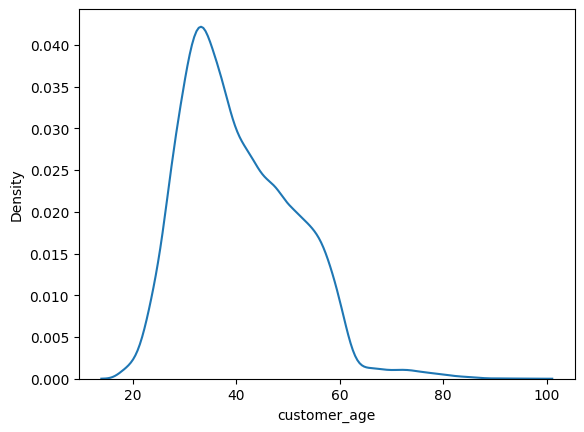

missing values of customer_age 619


In [13]:
eda('customer_age',df,col_to_miss)

1.Continous numeric data

2.Missing values to be handled, can be filled with mean

## **job_type**

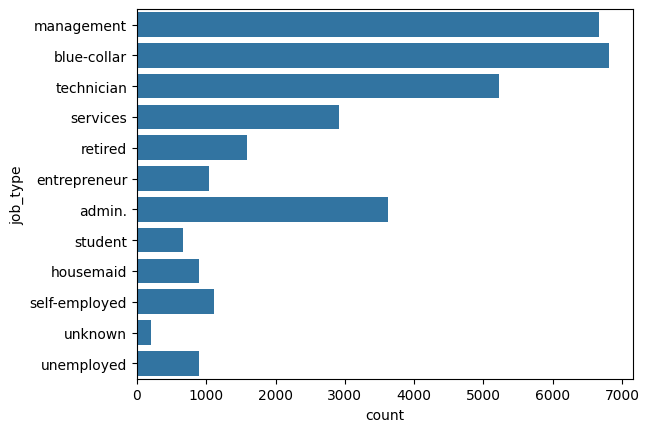

value_counts of job_type job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: count, dtype: int64
missing values of job_type 0


In [14]:
eda('job_type',df,col_to_miss)

In [15]:
col_to_le.append('job_type')

1.Categorical data to be encoded

2.No missing values


## **marital**

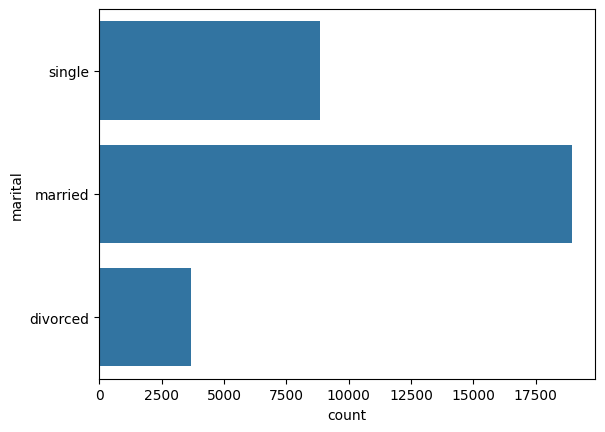

value_counts of marital marital
married     18945
single       8857
divorced     3695
Name: count, dtype: int64
missing values of marital 150


In [16]:
eda('marital',df,col_to_miss)

In [17]:
col_to_le.append('marital')

1.Categorical data to be encoded

2.Missing values to be handled

3.Majority is married

### ***education  ***

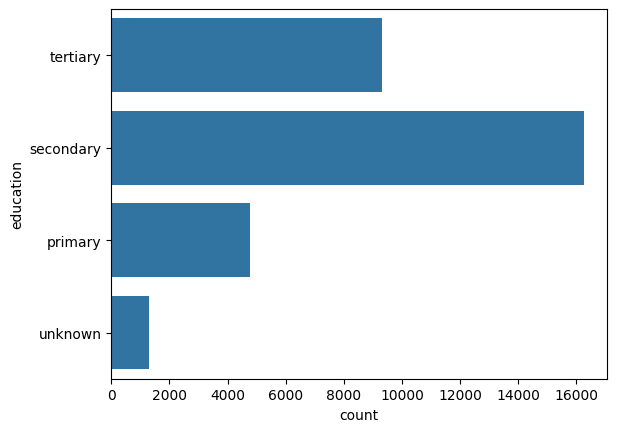

value_counts of education education
secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: count, dtype: int64
missing values of education 0


In [18]:
eda('education',df,col_to_miss)

In [19]:
col_to_le.append('education')

1.Categorical data to be encoded

2.No missing values

3.Secondary education is polling the most

## **'default'**

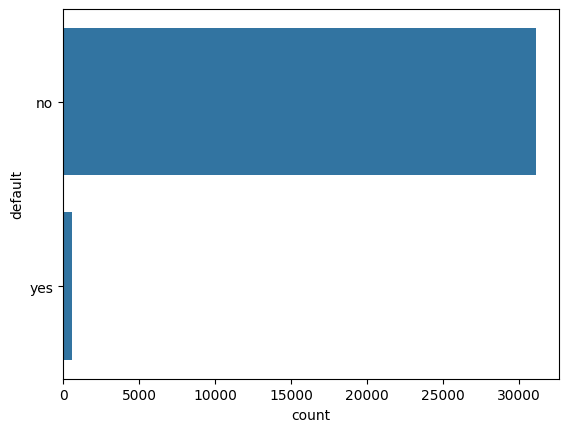

value_counts of default default
no     31094
yes      553
Name: count, dtype: int64
missing values of default 0


In [20]:
eda('default',df,col_to_miss)

In [21]:
col_to_le.append('default')

1.Categorical data to be encoded

2.No missing values

3.Majority is non defaulters

## **'balance'**

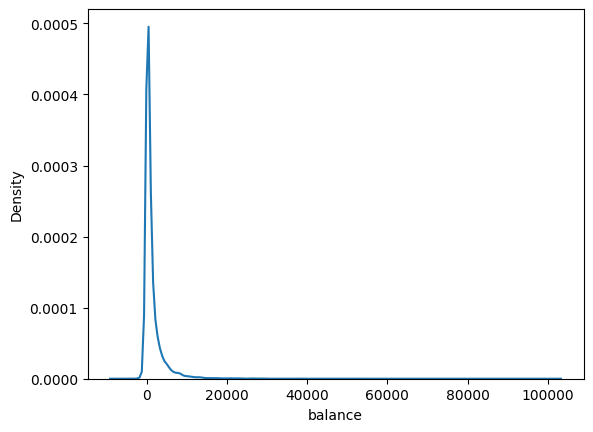

missing values of balance 399


In [22]:
eda('balance',df,col_to_miss)

1.Continous numeric data

2.Missing values to be treated

3.Left skewed



## **'housing_loan'**

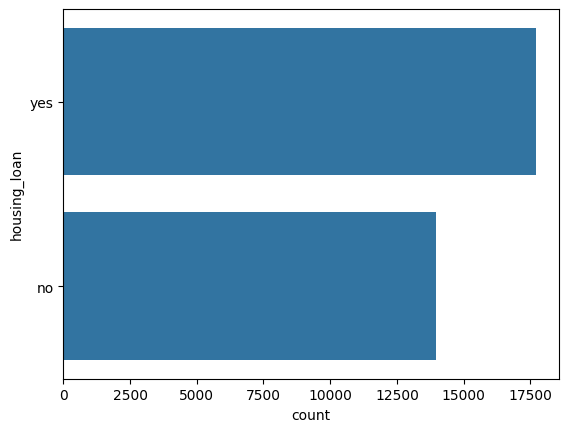

value_counts of housing_loan housing_loan
yes    17700
no     13947
Name: count, dtype: int64
missing values of housing_loan 0


In [23]:
eda('housing_loan',df,col_to_miss)

In [24]:
col_to_le.append('housing_loan')

1.Categorical data to be encoded


## **personal_loan**

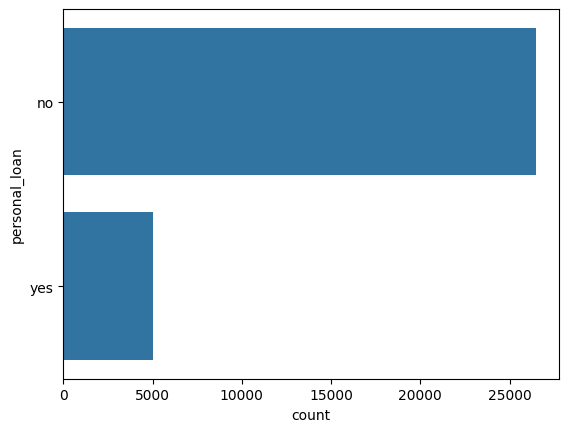

value_counts of personal_loan personal_loan
no     26463
yes     5035
Name: count, dtype: int64
missing values of personal_loan 149


In [25]:
eda('personal_loan',df,col_to_miss)

In [26]:
col_to_le.append('personal_loan')

1.Categorical data to be encoded

2.Missing values to be treated

3.Majority have personal loan

## **'communication_type'**

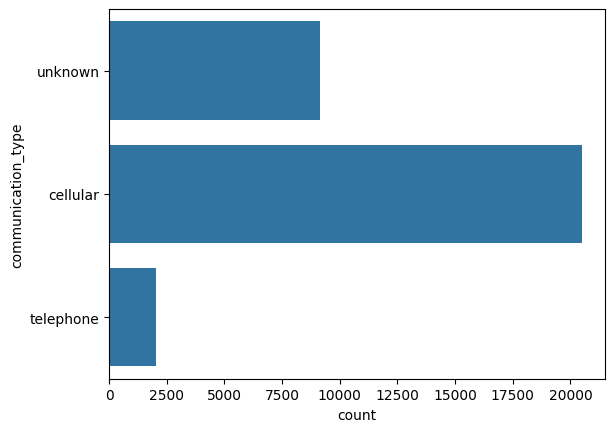

value_counts of communication_type communication_type
cellular     20480
unknown       9151
telephone     2016
Name: count, dtype: int64
missing values of communication_type 0


In [27]:
eda('communication_type',df,col_to_miss)

In [28]:
col_to_le.append('communication_type')

1.Categorical data to be encoded

2.Majority have been contacted by cellular

## **'day_of_month'**

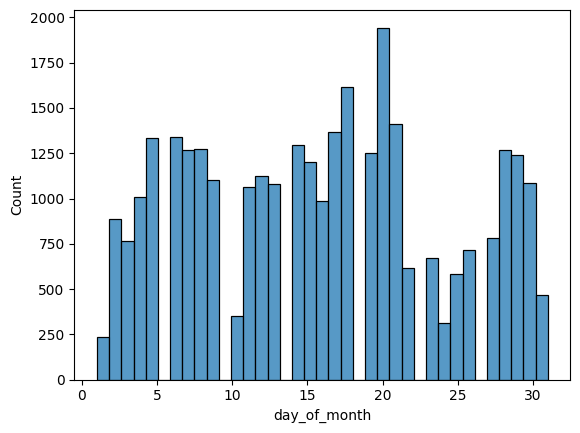

value_counts of day_of_month day_of_month
20    1944
18    1615
21    1414
17    1366
6     1342
5     1336
14    1294
8     1276
7     1269
28    1268
19    1249
29    1240
15    1201
12    1122
9     1101
30    1087
13    1080
11    1062
4     1009
16     985
2      885
27     780
3      767
26     715
23     670
22     618
25     583
31     469
10     353
24     312
1      235
Name: count, dtype: int64
missing values of day_of_month 0


In [29]:
eda('day_of_month',df,col_to_miss)

1.Discrete Numeric data


## **'month'**

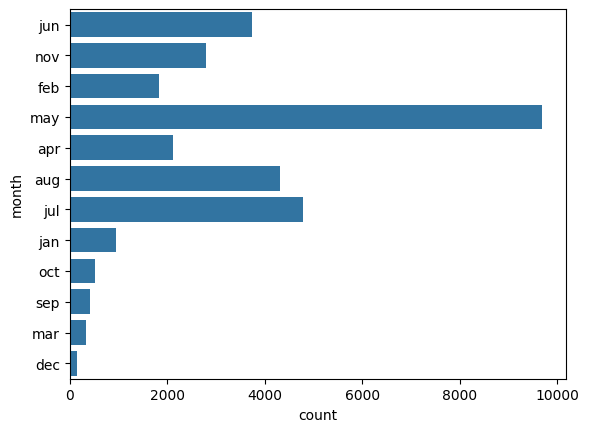

value_counts of month month
may    9685
jul    4786
aug    4308
jun    3746
nov    2801
apr    2111
feb    1836
jan     953
oct     510
sep     417
mar     338
dec     156
Name: count, dtype: int64
missing values of month 0


In [30]:
eda('month',df,col_to_miss)

In [31]:
col_to_le.append('month')

1.Categorical data to be encoded

## **'last_contact_duration'**

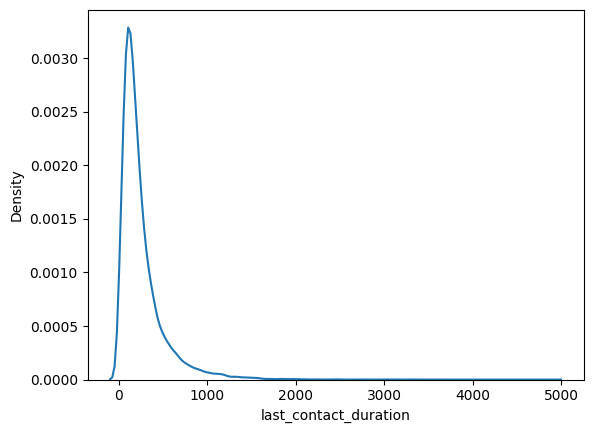

missing values of last_contact_duration 311


In [32]:
eda('last_contact_duration',df,col_to_miss)

1.Continuous numeric data

2.Missing values can be filled by zero

## **'num_contacts_in_campaign'**

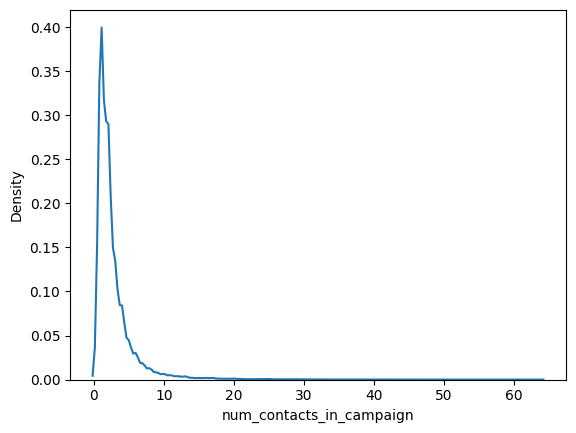

missing values of num_contacts_in_campaign 112


In [33]:
eda('num_contacts_in_campaign',df,col_to_miss)

1.Continuous numeric data but it can be converted to discrete numeric after treating missing values.

## **'days_since_prev_campaign_contact'**

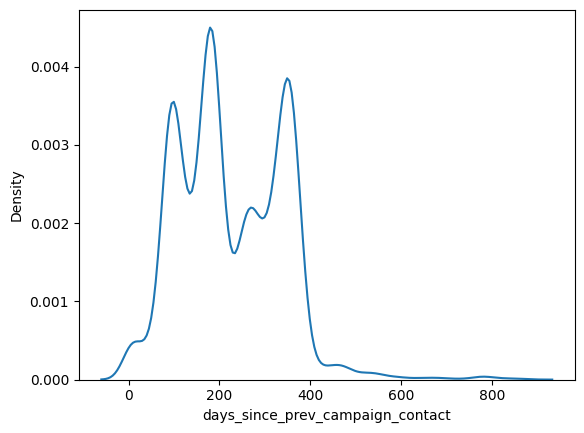

missing values of days_since_prev_campaign_contact 25831


In [34]:
eda('days_since_prev_campaign_contact',df,col_to_miss)

1.Continuous numeric data

2.Missing values to be treated


## **'num_contacts_prev_campaign'**

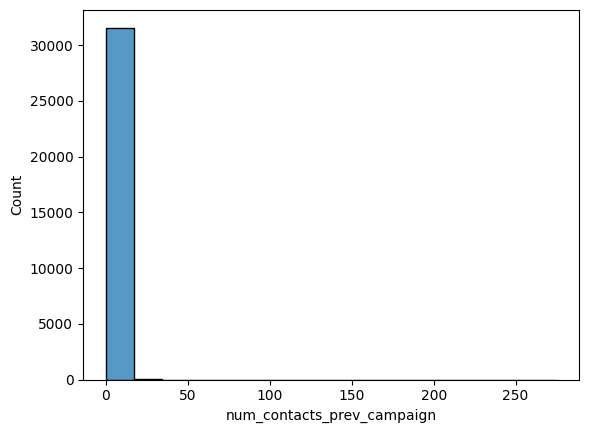

value_counts of num_contacts_prev_campaign num_contacts_prev_campaign
0      25831
1       1938
2       1507
3        806
4        500
5        311
6        188
7        148
8         91
9         62
10        48
11        46
12        34
13        28
14        15
15        14
17        11
20         7
19         7
23         6
16         6
22         5
18         5
24         4
25         4
27         4
29         3
30         3
37         2
21         2
275        1
55         1
32         1
41         1
26         1
38         1
40         1
51         1
58         1
35         1
28         1
Name: count, dtype: int64
missing values of num_contacts_prev_campaign 0


In [35]:
eda('num_contacts_prev_campaign',df,col_to_miss)

1.Discrte numeric column

## **'prev_campaign_outcome'**

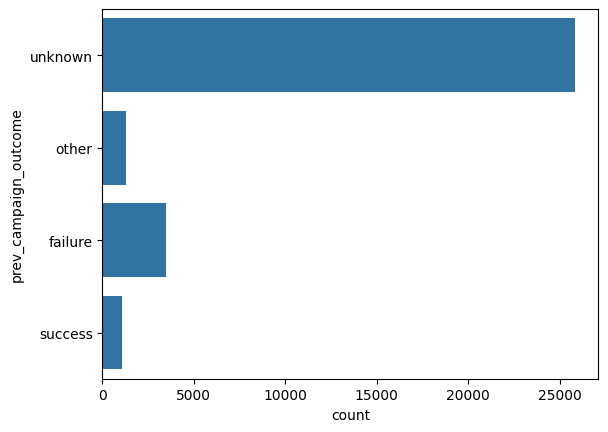

value_counts of prev_campaign_outcome prev_campaign_outcome
unknown    25833
failure     3472
other       1272
success     1070
Name: count, dtype: int64
missing values of prev_campaign_outcome 0


In [36]:
eda('prev_campaign_outcome',df,col_to_miss)

In [37]:
col_to_le.append('prev_campaign_outcome')

1.Categorical data to be  label encoded
2.Majority has unknown outcome

## **'term_deposit_subscribed**

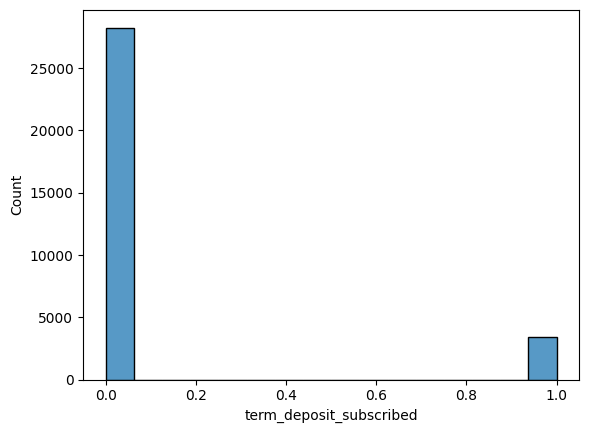

value_counts of term_deposit_subscribed term_deposit_subscribed
0    28253
1     3394
Name: count, dtype: int64
missing values of term_deposit_subscribed 0


In [38]:
eda('term_deposit_subscribed',df,col_to_miss)

1.Discrete numeric data
2.Majority is No

# **4.Data Cleaning**

### **Handling missing Values**

In [39]:
#Columns t handle missing values
col_to_miss

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [40]:
for i in col_to_miss:
  if df[i].isna().sum()>(0.8*df.shape[0]):
    print(f"column {i} has more than 80% missing values")



column days_since_prev_campaign_contact has more than 80% missing values


After trimming the outliers there are no values here in the column 'days_since_prev_campaign_contact'.So that column is dropped.

In [41]:
df.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [42]:
#Filling na value with median of the columns
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)

In [43]:
#Marital na values are filled by constant = missing
df['marital'].fillna('missing',inplace=True)

In [44]:
#Filling na values with zero
df['balance']=df['balance'].fillna(0)

In [45]:
#Filling na values with constant=no
df['personal_loan'].fillna('no',inplace=True)

In [46]:
#last_contact_duration
df['last_contact_duration'].fillna(0,inplace=True)

In [47]:
#filling na values with  0
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [48]:
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)


In [49]:
df.isna().sum()

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

Missing values are treated.

### **Outliers-Handling**

<Axes: >

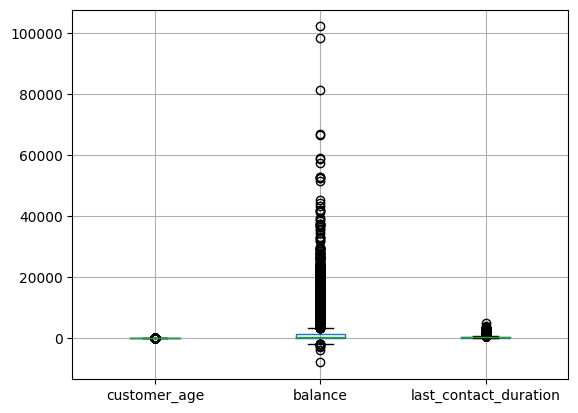

In [50]:
#Plotting boxplots to identify the outliers
df.select_dtypes(include='float').boxplot()

In [51]:
#Identifying ouliers in each column of continuous numeric data
for i in df.select_dtypes(include='float').columns:
  outlier=[]
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier.append(j)

  print(f"outlier for column {i}are ",outlier)
  #Outlier is not handled as it will remove the column 'num_contacts_prev_campaign'

'''
  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outlier_n=[]
  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier_n.append(j)
  print(f"outlier for column {i}are ",outlier_n)
'''


outlier for column customer_ageare  [78.0, 76.0, 73.0, 88.0, 73.0, 81.0, 79.0, 73.0, 77.0, 75.0, 74.0, 74.0, 86.0, 77.0, 79.0, 75.0, 95.0, 77.0, 74.0, 74.0, 79.0, 76.0, 74.0, 76.0, 73.0, 80.0, 75.0, 79.0, 77.0, 74.0, 82.0, 79.0, 76.0, 75.0, 82.0, 73.0, 76.0, 86.0, 73.0, 77.0, 80.0, 83.0, 78.0, 75.0, 74.0, 75.0, 77.0, 74.0, 77.0, 76.0, 77.0, 77.0, 79.0, 79.0, 73.0, 79.0, 75.0, 83.0, 84.0, 73.0, 79.0, 77.0, 76.0, 78.0, 74.0, 74.0, 83.0, 73.0, 78.0, 81.0, 73.0, 73.0, 76.0, 75.0, 80.0, 75.0, 84.0, 73.0, 80.0, 74.0, 74.0, 76.0, 78.0, 78.0, 75.0, 97.0, 81.0, 82.0, 75.0, 77.0, 77.0, 73.0, 76.0, 75.0, 87.0, 73.0, 73.0, 84.0, 81.0, 80.0, 73.0, 73.0, 73.0, 86.0, 78.0, 82.0, 79.0, 77.0, 76.0, 75.0, 87.0, 73.0, 80.0, 80.0, 81.0, 80.0, 91.0, 80.0, 73.0, 77.0, 85.0, 74.0, 74.0, 75.0, 74.0, 73.0, 75.0, 86.0, 75.0, 74.0, 75.0, 75.0, 80.0, 75.0, 75.0, 85.0, 74.0, 77.0, 74.0, 83.0, 86.0, 76.0, 85.0, 74.0, 74.0, 75.0, 76.0, 85.0, 73.0, 81.0, 73.0, 80.0, 79.0, 91.0, 76.0, 79.0, 77.0, 82.0, 73.0, 76.0, 74.

'\n  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)\n  outlier_n=[]\n  for j in df[i]:\n    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):\n      outlier_n.append(j)\n  print(f"outlier for column {i}are ",outlier_n)\n'

In [52]:
#Creating a copy of data frame and further analysis is done on df_n
df_n=df.copy()

In [53]:
#Dropping the id
df_n.drop(['id'],axis=1,inplace=True)

# Feature reduction

In [54]:
from scipy.stats import chi2_contingency,chi2

In [55]:
def chi2_test(df1, df2):
  alpha = 0.05
  cont_table = pd.crosstab(index=df1,columns=df2)
  #cont_table.head()
  # chi2 value, p value, degree of freedom , expected_table
  chi2_value, p, dof, expected_table = chi2_contingency(cont_table)

  print(f'chi2 value: {chi2_value}')
  print(f'p value: {p}')
  print(f'degree of freedom: {dof}')
  if p <= alpha:
    print(f'Reject null hypothesis. There exist some relation between features ')
  else:
    print(f'Accept null hypothesis. Two features are not related')

# **5.Data Visualisation**

**a.Univariate Analysis**

**categorical columns**

In [56]:

df_n_o=df_n.select_dtypes(include='object')
df_n_o.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [57]:


figsize = (10,15)
def obj_dep(dataset, col_l, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, figsize=figsize) # axs is a numpy array of axes objects
    fig.suptitle(suptitle, x=1,y=1, size=10)
    axs = axs.flatten() # flatten the array to iterate over the axes objects
    for i, data in enumerate(columns_list):
        ax = sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue=hue, palette=palette, edgecolor='white') # pass the axes object to countplot
        axs[i].set_title(data + f' vs {hue}', size=10)
        for i in ax.containers:
            ax.tick_params(axis='x', labelsize=10,rotation=90)
            ax.legend(['Not Subscrib', 'Subscribed'], title = 'Subscription', fontsize=10, title_fontsize=10)

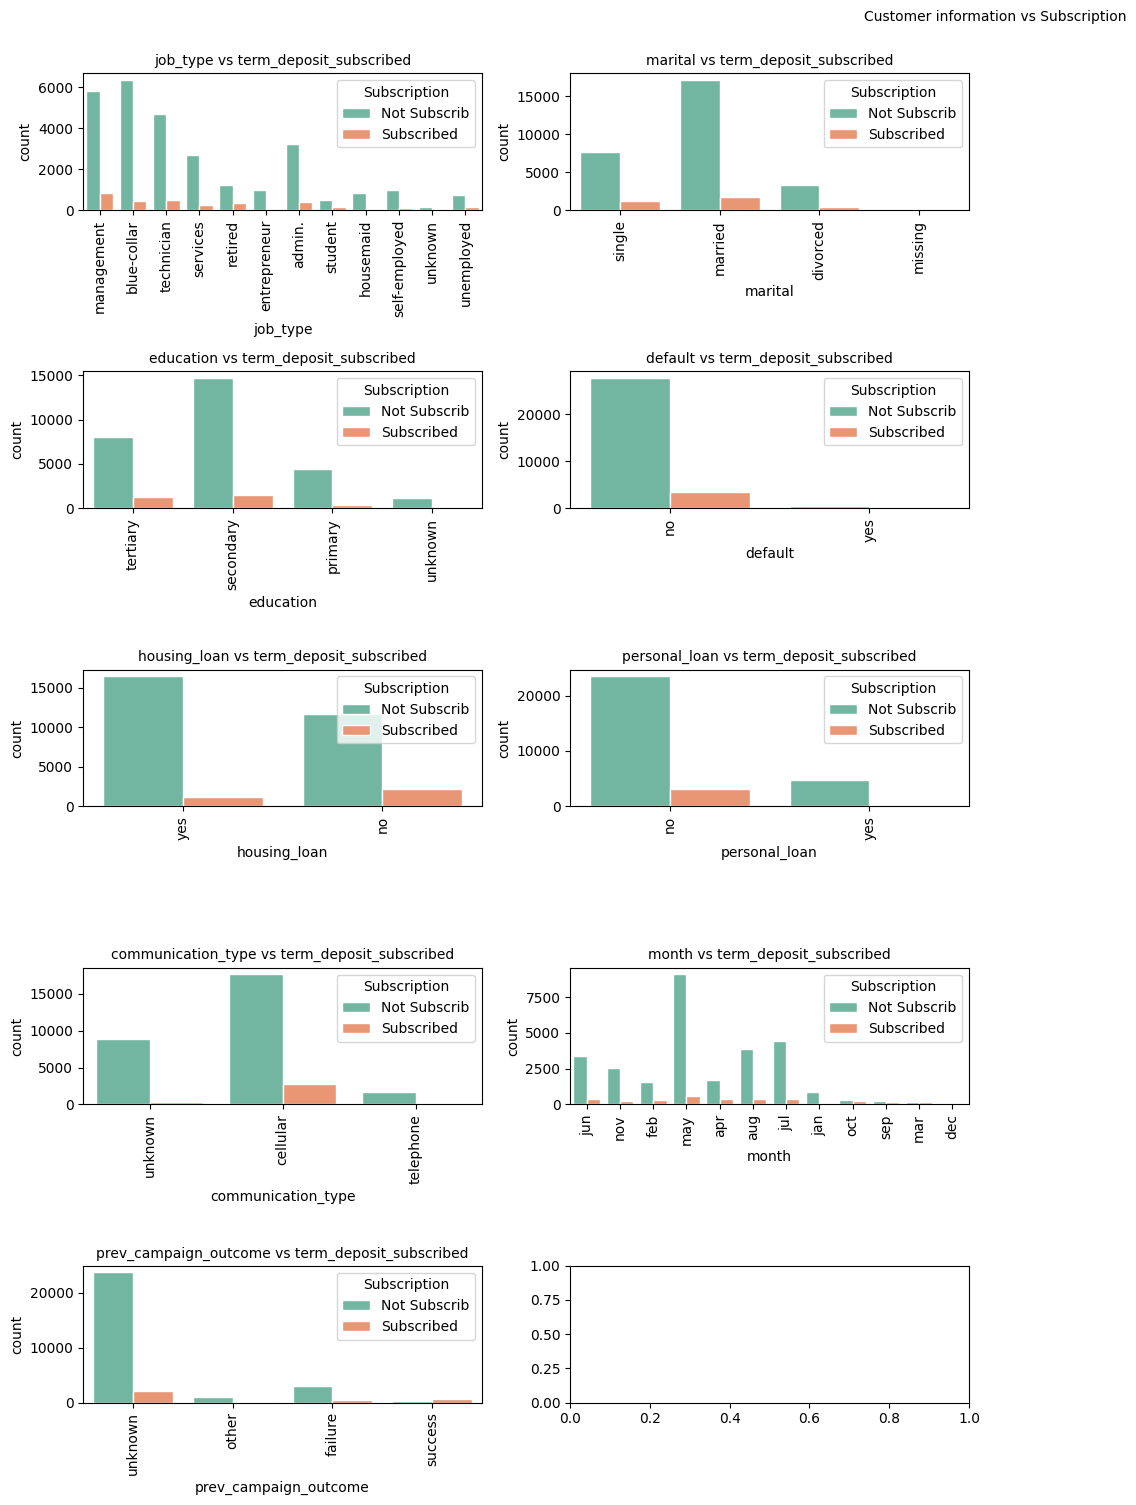

In [58]:
hue='term_deposit_subscribed'
palette='Set2'
columns_list=df_n_o.columns
obj_dep(dataset=df_n, col_l=df_n_o, rows=5, cols=2, figsize=figsize, hue=hue,palette=palette,suptitle='Customer information vs Subscription')
plt.tight_layout()

Categorical data:

job_type:
most of the subscription from the job_types management,blue_collar,technician,services and admin.

marital:
Most of the subscription from the married people.

education:
Most of the people are of secondary education and they are subscribed the most.

Default:
Most of the subscription from the non defaulters.For the defaulters, both subscription and non_subscription numbers are low.

housing loan:
People having housing loan and term deposits are high.

personal loan:
People having no personal loan subscribed the most.
communication_type:
Most of the people are contacted by cellular and they subscribed the most.

month:
Most of the subscriptions happened in the month of May.
Previous campaign_outcme:
Previous campaign outcome as 'unknown' subscribed the most.





In [59]:
for i in df_n_o.columns:
  print(i)
  chi2_test(df[i],df['term_deposit_subscribed'])


job_type
chi2 value: 596.0139764559476
p value: 9.976016692922077e-121
degree of freedom: 11
Reject null hypothesis. There exist some relation between features 
marital
chi2 value: 131.6029679962184
p value: 2.4412638629577054e-28
degree of freedom: 3
Reject null hypothesis. There exist some relation between features 
education
chi2 value: 167.38085370183921
p value: 4.6781502746884204e-36
degree of freedom: 3
Reject null hypothesis. There exist some relation between features 
default
chi2 value: 11.829344158530068
p value: 0.0005830452682287189
degree of freedom: 1
Reject null hypothesis. There exist some relation between features 
housing_loan
chi2 value: 661.2478549208123
p value: 7.9975382662918075e-146
degree of freedom: 1
Reject null hypothesis. There exist some relation between features 
personal_loan
chi2 value: 136.79093029263993
p value: 1.3397367364564183e-31
degree of freedom: 1
Reject null hypothesis. There exist some relation between features 
communication_type
chi2 valu

In [60]:
df_n.drop(['month','prev_campaign_outcome'],axis=1,inplace=True)

**Continuous numeric columns**

In [61]:
figsize = (10,10)
def obj_dep(dataset, col_l, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(suptitle,x=1, y=1, size=10)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax = sns.histplot(data=dataset, ax=axs[i], x=columns_list[i], hue=hue, palette=palette, edgecolor='white')
        axs[i].set_title(data + f' vs {hue}', size=10)
        for i in ax.containers:
            ax.legend(['Not Subscrib', 'Subscribed'], title = 'Subscription', fontsize=10, title_fontsize=10)


In [62]:
df_n_nu_c=df_n.select_dtypes(include='float')
df_n_nu_c.columns

Index(['customer_age', 'balance', 'last_contact_duration'], dtype='object')

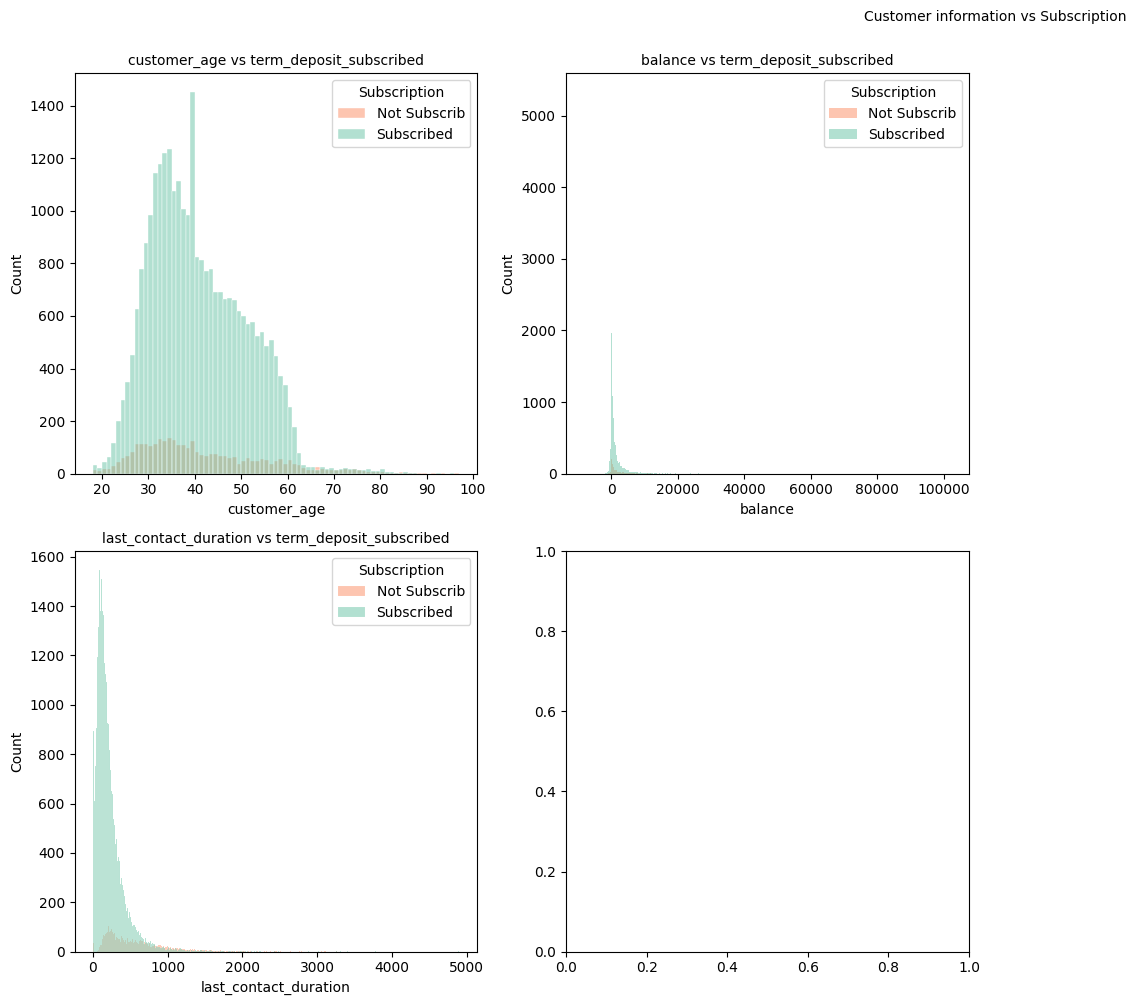

In [63]:
hue='term_deposit_subscribed'
palette='Set2'
columns_list=df_n_nu_c.columns
obj_dep(dataset=df_n, col_l=df_n_nu_c, rows=2, cols=2, figsize=figsize, hue=hue,palette=palette,suptitle='Customer information vs Subscription')
# plt.subplot(9,1,9).axis('off')
plt.tight_layout()

**Discrete numeric columns**

In [64]:
df_n_nu_d=df_n.select_dtypes(include='int')
df_n_nu_d.columns

Index(['day_of_month', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

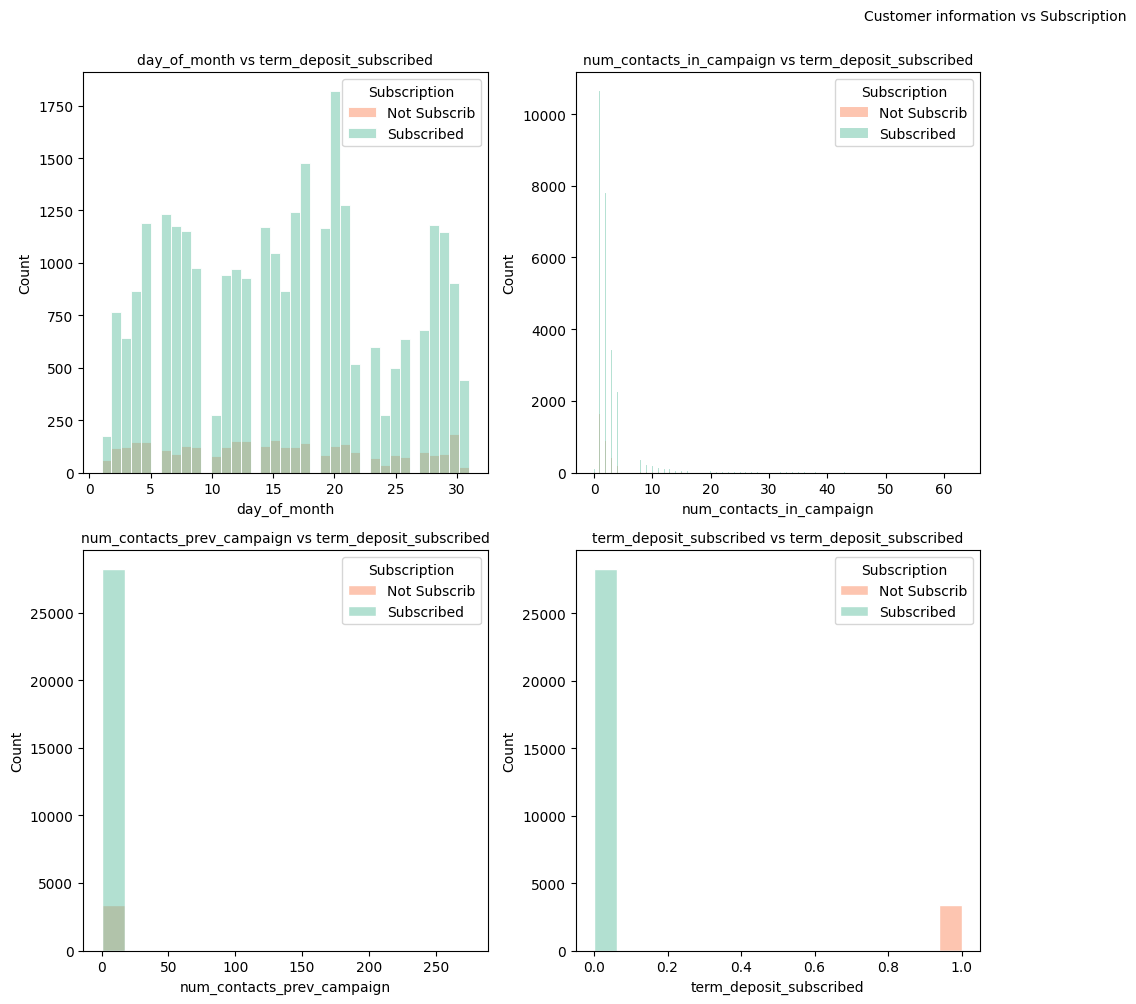

In [65]:
hue='term_deposit_subscribed'
palette='Set2'
columns_list=df_n_nu_d.columns
obj_dep(dataset=df_n, col_l=df_n_nu_d, rows=2, cols=2, figsize=figsize, hue=hue,palette=palette,suptitle='Customer information vs Subscription')
# plt.subplot(9,1,9).axis('off')
plt.tight_layout()

In [66]:
for i in df_n_nu_d.columns:
  print(i)
  chi2_test(df[i],df['term_deposit_subscribed'])

day_of_month
chi2 value: 393.4949728473523
p value: 5.7524192296634395e-65
degree of freedom: 30
Reject null hypothesis. There exist some relation between features 
num_contacts_in_campaign
chi2 value: 238.9323994968106
p value: 7.120718148133698e-28
degree of freedom: 46
Reject null hypothesis. There exist some relation between features 
num_contacts_prev_campaign
chi2 value: 1078.4514383368457
p value: 4.4806479603253896e-200
degree of freedom: 40
Reject null hypothesis. There exist some relation between features 
term_deposit_subscribed
chi2 value: 31636.55633692823
p value: 0.0
degree of freedom: 1
Reject null hypothesis. There exist some relation between features 


## **2.Bivariate Analysis**

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

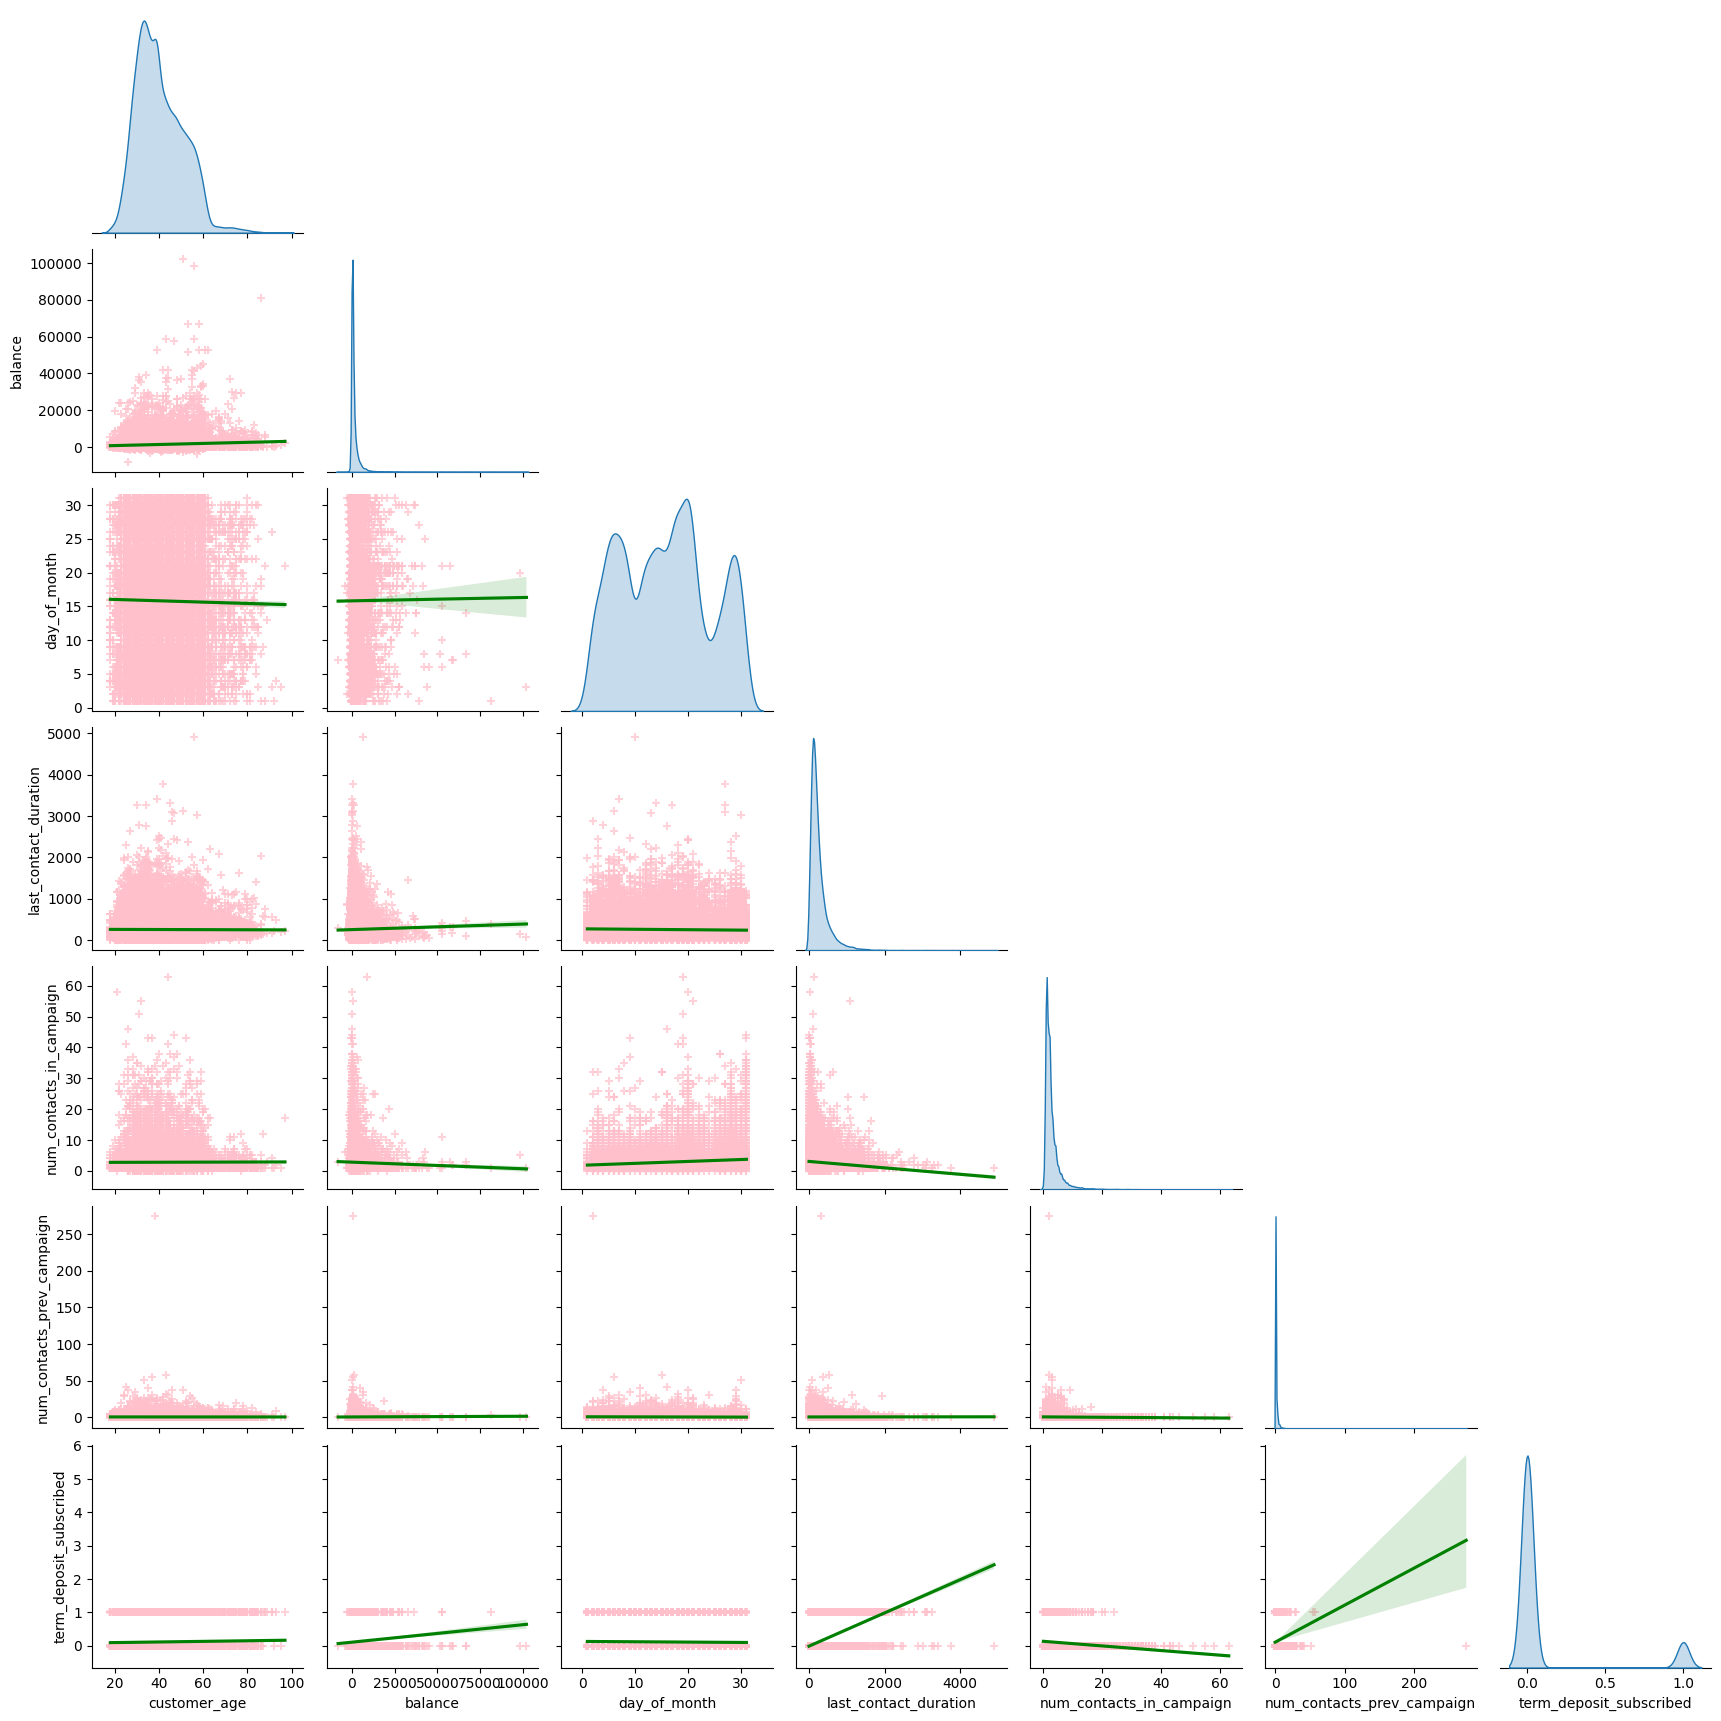

In [67]:
sns.pairplot(df_n,
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'green'},
                           'scatter_kws': {'alpha': 0.7,
                                           'color': 'pink'}},
                 corner=True);

In [68]:
#column month is dropped as it affects the target less
df_n.drop(['day_of_month'],axis=1,inplace=True)

# **3.Multivariate Analysis**

### **Correlation Anlysis for numeric data**

In [69]:
df_n.select_dtypes(include=[np.number]).corr()

,customer_age,balance,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.101839,-0.006454,0.005754,-0.001395,0.031045
balance,0.101839,1.000000,0.015975,-0.020950,0.011554,0.052095
last_contact_duration,-0.006454,0.015975,1.000000,-0.084824,0.004055,0.412853
num_contacts_in_campaign,0.005754,-0.020950,-0.084824,1.000000,-0.033187,-0.070614
num_contacts_prev_campaign,-0.001395,0.011554,0.004055,-0.033187,1.000000,0.089881
term_deposit_subscribed,0.031045,0.052095,0.412853,-0.070614,0.089881,1.000000


<Axes: >

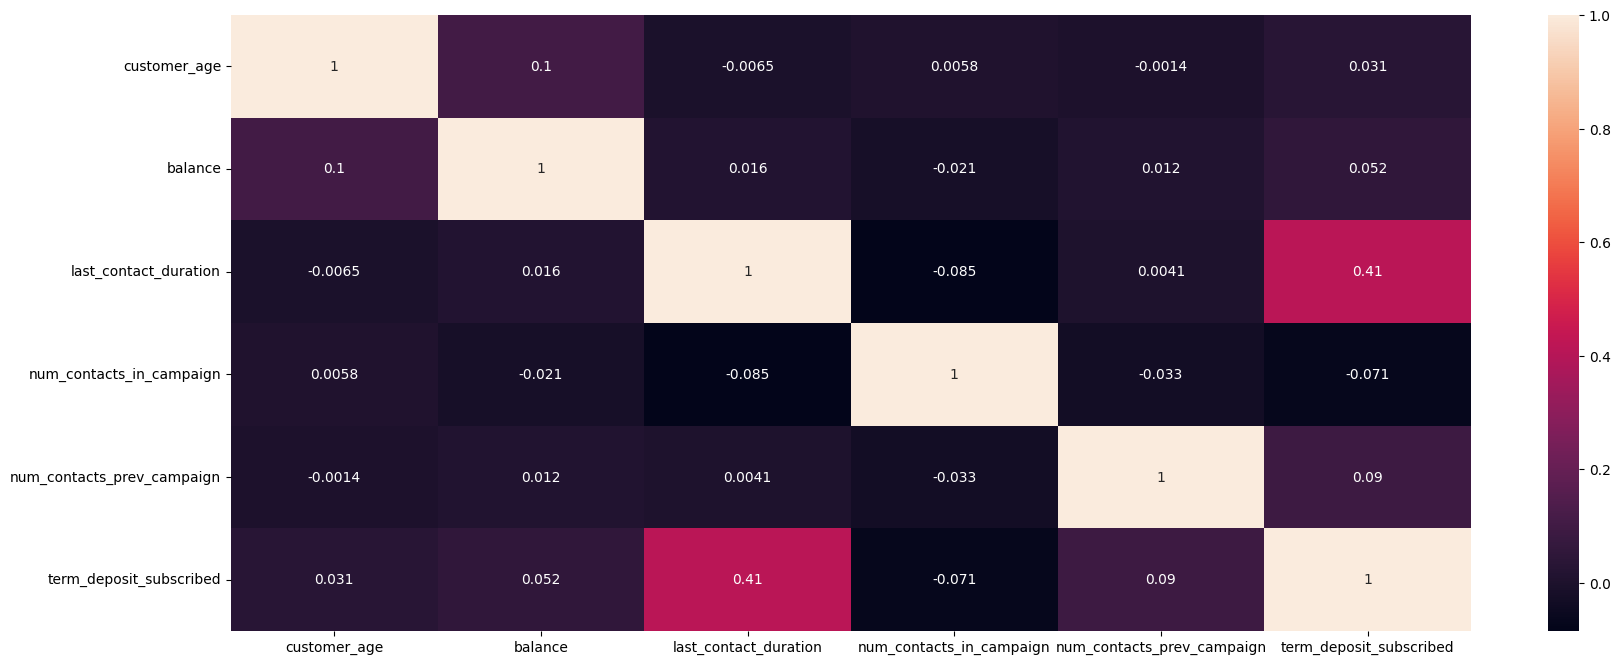

In [70]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_n.select_dtypes(include=[np.number]).corr(),annot=True)

Observation from the correlation plot

1. No high correlation can be seen
2. There is slight corelation between last_contact_duration and Term_deposit_subscribed

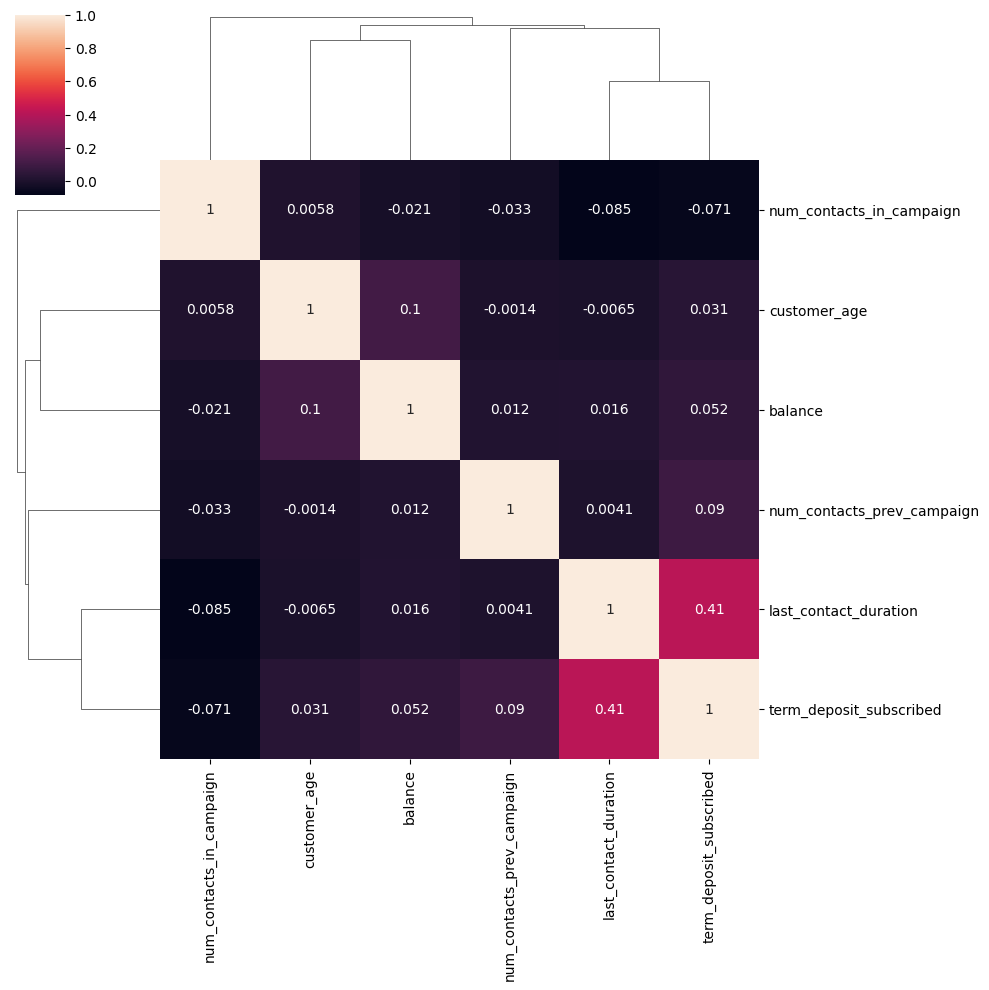

In [71]:
sns.clustermap(df_n.select_dtypes(include=[np.number]).corr(),annot=True)

# **skewness**

Absolute values of skewnwss greater than 0.8 are treated using sqrt transformation.

customer_age
skewnwss for column customer_age is 0.6760550814614379


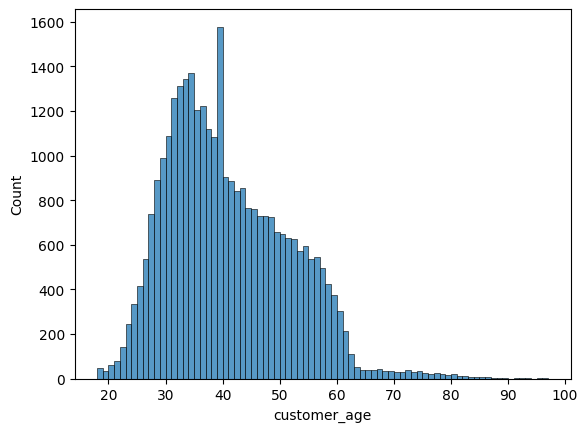

balance
skewnwss for column balance is 8.543262357149327


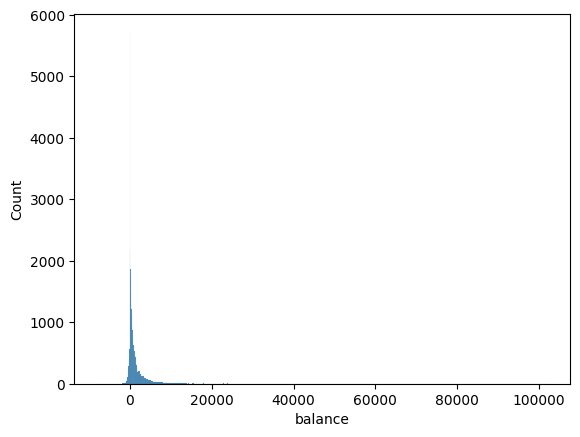

last_contact_duration
skewnwss for column last_contact_duration is 3.1548640227438893


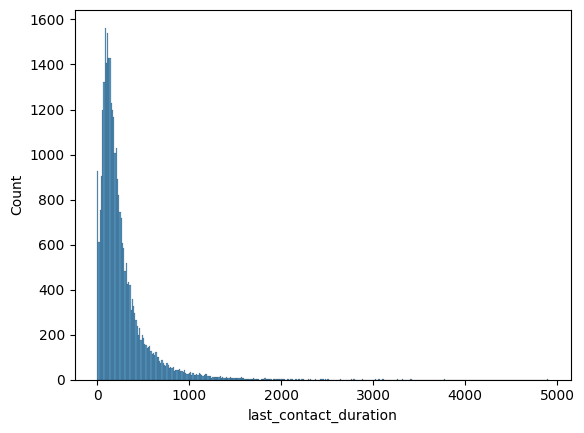

In [72]:
#plotting the histogram before log transformation
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()


sqrt transformation is applied except the column balance as it gives some error values.

customer_age
skewnwss for column customer_age is 0.6760550814614379


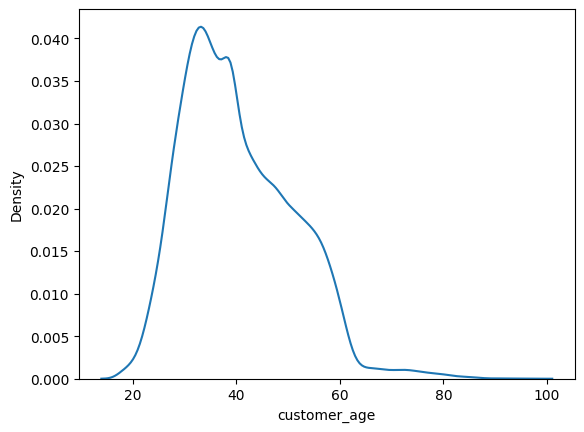

balance
skewnwss for column balance is 8.543262357149327


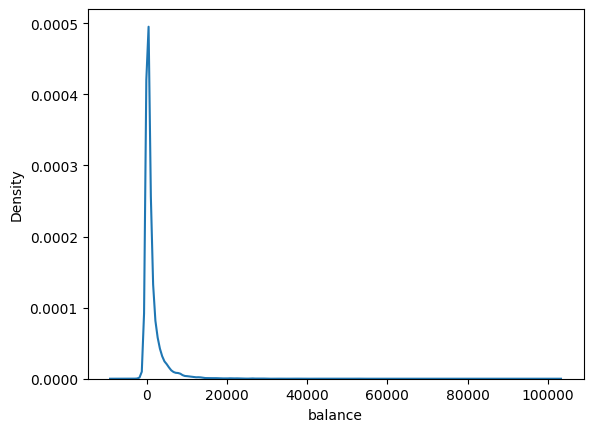

last_contact_duration
skewnwss for column last_contact_duration is 1.0087220873983809


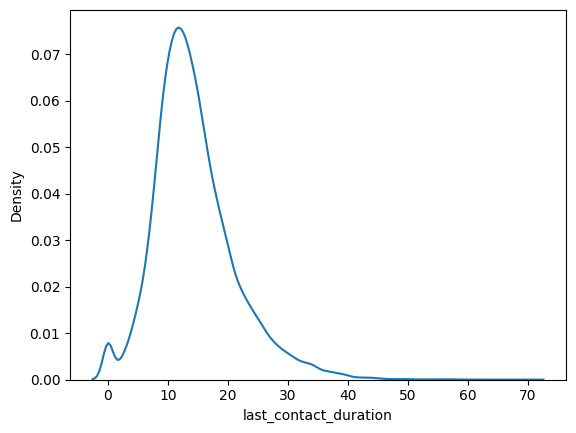

In [73]:
#plotting kdeplot after the sqrt transformation applied

pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  if abs(df_n[i].skew())>0.8 and (i!='balance'):
    df_n[i]=np.sqrt(df_n[i])
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.kdeplot(df_n[i])
  plt.show()

# **Label encoding**

In [74]:
col_to_le

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['default', 'housing_loan', 'personal_loan']:
 df_n[i]=le.fit_transform(df_n[i])


In [76]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in ['job_type', 'marital', 'education','communication_type']:
  df_n[i]=oe.fit_transform(df_n[i].values.reshape(-1,1))

In [77]:
for i in ['job_type', 'marital', 'education','communication_type']:
  df_n[i]=df_n[i].astype(int)

In [78]:
#Checking data types to see the encoding
df_n.dtypes

customer_age                  float64
job_type                        int64
marital                         int64
education                       int64
default                         int64
balance                       float64
housing_loan                    int64
personal_loan                   int64
communication_type              int64
last_contact_duration         float64
num_contacts_in_campaign        int64
num_contacts_prev_campaign      int64
term_deposit_subscribed         int64
dtype: object

In [79]:
df_n.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
term_deposit_subscribed       0
dtype: int64

In [80]:
import joblib
from joblib import dump


In [81]:
joblib.dump(df_n,'df_n.joblib')

['df_n.joblib']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_n)


In [83]:
joblib.dump(df_std,'df_std.joblib')

['df_std.joblib']

# **Test data**

# **1. Under standing Test data**



### **.Data loading**

In [84]:
#loading train data
df=pd.read_csv("/content/Test.csv")

## **2.Data Exploration**

In [85]:
#Displying Dataframe
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [86]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

There are 13564 records of data under 17 columns.There are categorical as well as numerical columns with some missing values.

In [87]:
#The data types value_counts
df.dtypes.value_counts()

object     10
float64     5
int64       2
Name: count, dtype: int64

Same as train data

In [88]:
#Statistical summary of numeric data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [89]:
#summary of the categorical columns
df.describe(include='object')

,id,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
count,13564,13564,13483,13564,13564,13564,13490,13564,13564,13564
unique,13564,12,3,4,2,2,2,3,12,4
top,id_17231,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,1,2916,8123,6955,13302,7430,11314,8805,4081,11126


In [90]:
#Missing values identification
df.isna().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [91]:
#Defining empty lists to identify which columns to be handled for missing values and encode
col_to_le=[]
col_to_miss=[]

In [92]:
#Defining a function for the univariate analysis of each column,
#ploting histograms for discrete numerical column, kdeplot for continuous numeric and
#countplot for categorical column , also identifying number of  missing values for each column
def eda(x,df,y):
  if df[x].dtype=='object':
    sns.countplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  elif df[x].dtype=='int64':
    sns.histplot(df[x])
    plt.show()
    print(f"value_counts of {x}",df[x].value_counts())
  else:
    sns.kdeplot(df[x])
    plt.show()



  print(f"missing values of {x}",df[x].isna().sum())
  if df[x].isna().sum()>0:
    y.append(x)


In [93]:
#Column names list
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [94]:
#To check for duplicated records of data
df[df.duplicated(keep='first')]

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome


# **Under standing data**





## **customer_age**

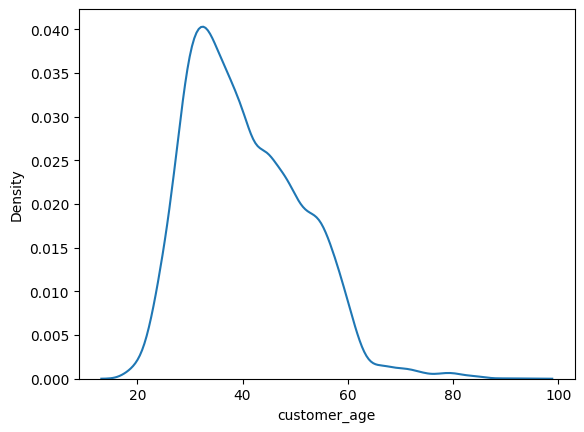

missing values of customer_age 270


In [95]:
eda('customer_age',df,col_to_miss)

1.Continous numeric data

2.Missing values to be handled, can be filled with mean

## **job_type**

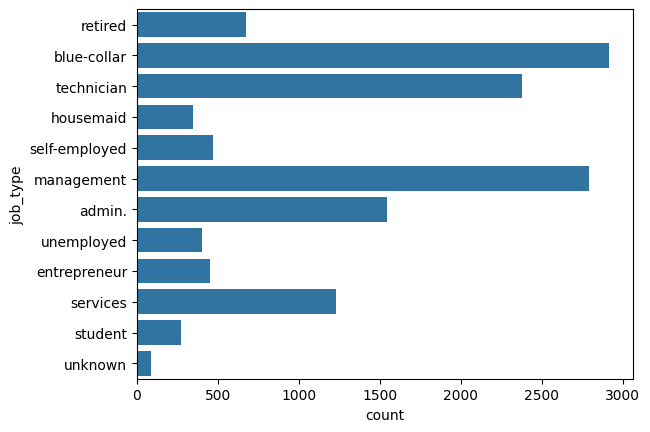

value_counts of job_type job_type
blue-collar      2916
management       2792
technician       2377
admin.           1544
services         1231
retired           673
self-employed     468
entrepreneur      450
unemployed        402
housemaid         347
student           275
unknown            89
Name: count, dtype: int64
missing values of job_type 0


In [96]:
eda('job_type',df,col_to_miss)

In [97]:
col_to_le.append('job_type')

1.Categorical data to be encoded

2.No missing values


## **marital**

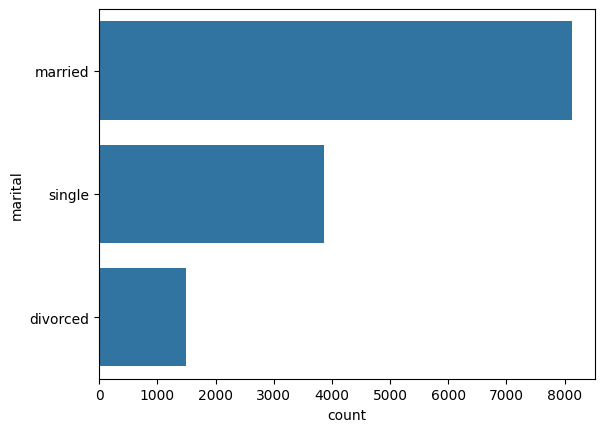

value_counts of marital marital
married     8123
single      3869
divorced    1491
Name: count, dtype: int64
missing values of marital 81


In [98]:
eda('marital',df,col_to_miss)

In [99]:
col_to_le.append('marital')

1.Categorical data to be encoded

2.Missing values to be handled

3.Majority is married

# **education**

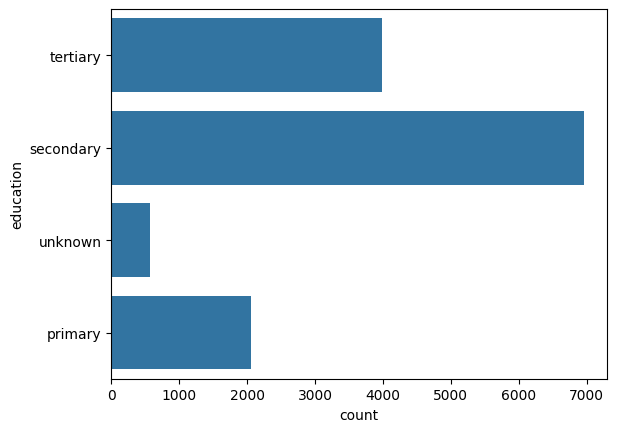

value_counts of education education
secondary    6955
tertiary     3980
primary      2064
unknown       565
Name: count, dtype: int64
missing values of education 0


In [100]:
eda('education',df,col_to_miss)

In [101]:
col_to_le.append('education')

1.Categorical data to be encoded

2.No missing values

3.Secondary education is polling the most

## **'default'**

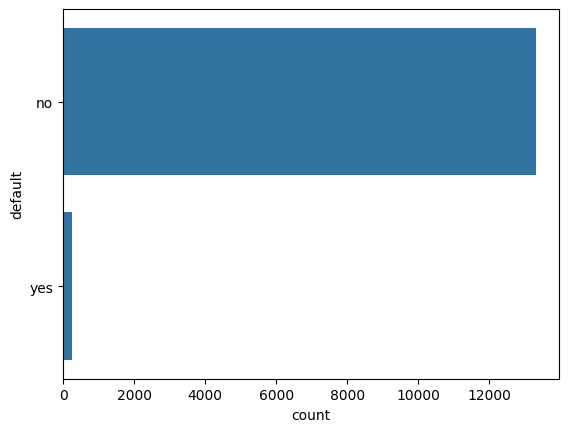

value_counts of default default
no     13302
yes      262
Name: count, dtype: int64
missing values of default 0


In [102]:
eda('default',df,col_to_miss)

In [103]:
col_to_le.append('default')

1.Categorical data to be encoded

2.No missing values

3.Majority is non defaulters

## **'balance'**

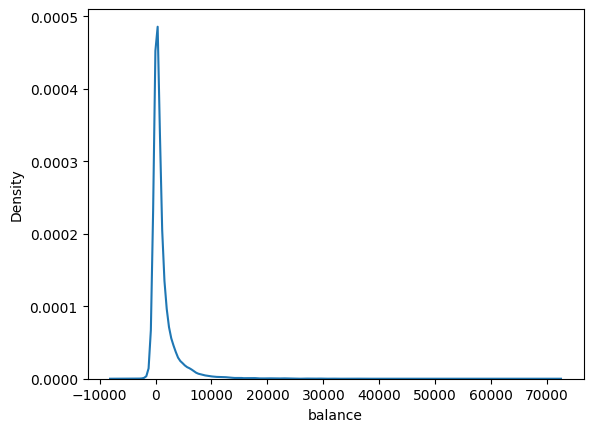

missing values of balance 181


In [104]:
eda('balance',df,col_to_miss)

1.Continous numeric data

2.Missing values to be treated

3.Left skewed



## **'housing_loan'**

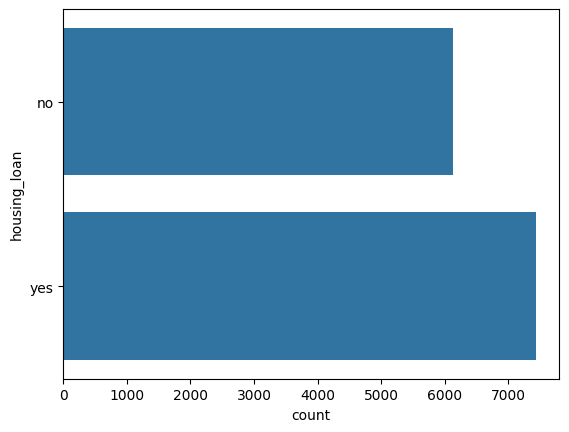

value_counts of housing_loan housing_loan
yes    7430
no     6134
Name: count, dtype: int64
missing values of housing_loan 0


In [105]:
eda('housing_loan',df,col_to_miss)

In [106]:
col_to_le.append('housing_loan')

1.Categorical data to be encoded


## **personal_loan**

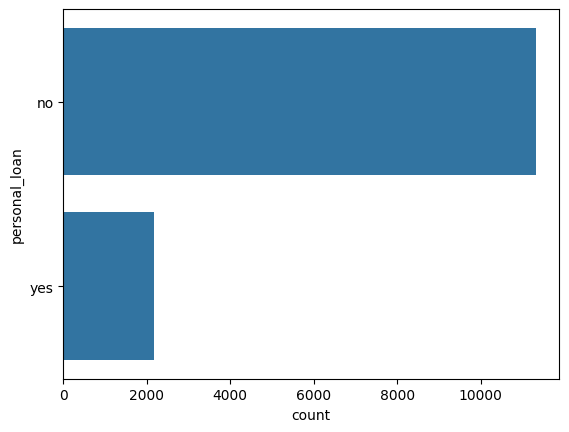

value_counts of personal_loan personal_loan
no     11314
yes     2176
Name: count, dtype: int64
missing values of personal_loan 74


In [107]:
eda('personal_loan',df,col_to_miss)

In [108]:
col_to_le.append('personal_loan')

1.Categorical data to be encoded

2.Missing values to be treated

3.Majority have personal loan

## **'communication_type'**

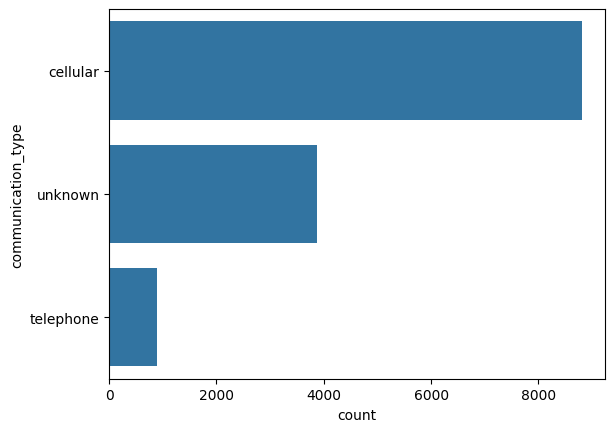

value_counts of communication_type communication_type
cellular     8805
unknown      3869
telephone     890
Name: count, dtype: int64
missing values of communication_type 0


In [109]:
eda('communication_type',df,col_to_miss)

In [110]:
col_to_le.append('communication_type')

1.Categorical data to be encoded

2.Majority have been contacted by cellular

## **'day_of_month'**

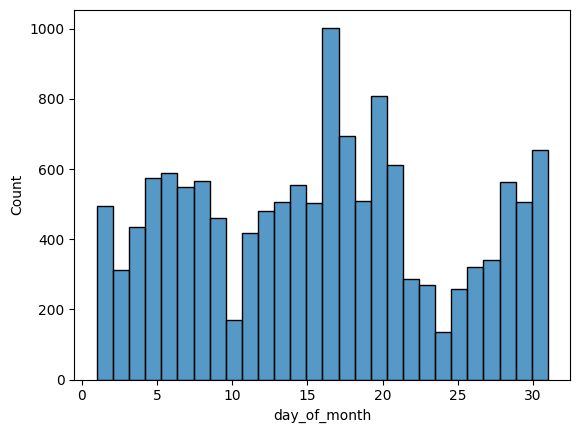

value_counts of day_of_month day_of_month
20    808
18    693
21    612
6     590
5     574
17    573
8     566
28    562
14    554
7     548
19    508
13    505
29    505
15    502
12    481
30    479
9     460
4     436
16    430
11    417
2     408
27    341
26    320
3     312
22    287
23    269
25    257
31    174
10    171
24    135
1      87
Name: count, dtype: int64
missing values of day_of_month 0


In [111]:
eda('day_of_month',df,col_to_miss)

1.Discrete Numeric data


## **'month'**

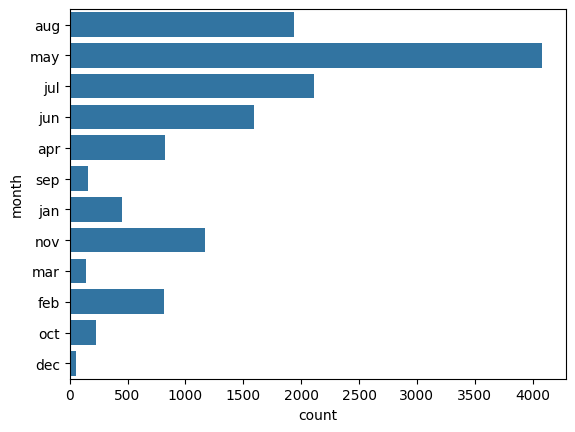

value_counts of month month
may    4081
jul    2109
aug    1939
jun    1595
nov    1169
apr     821
feb     813
jan     450
oct     228
sep     162
mar     139
dec      58
Name: count, dtype: int64
missing values of month 0


In [112]:
eda('month',df,col_to_miss)

In [113]:
col_to_le.append('month')

1.Categorical data to be encoded

## **'last_contact_duration'**

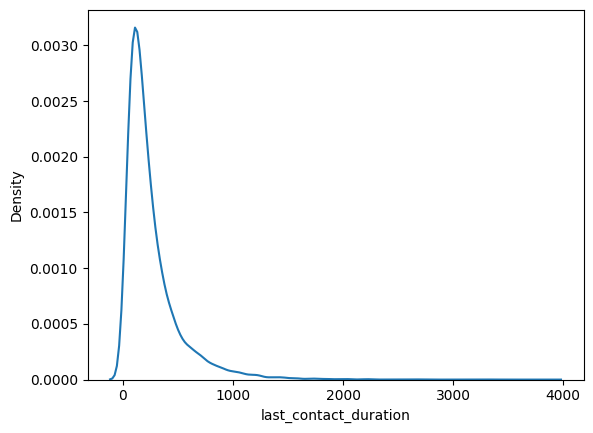

missing values of last_contact_duration 122


In [114]:
eda('last_contact_duration',df,col_to_miss)

1.Continuous numeric data

2.Missing values can be filled by zero

## **'num_contacts_in_campaign'**

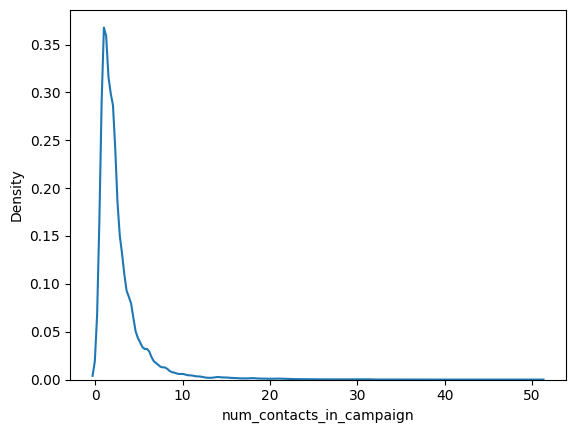

missing values of num_contacts_in_campaign 45


In [115]:
eda('num_contacts_in_campaign',df,col_to_miss)

1.Continuous numeric data but it can be converted to discrete numeric after treating missing values.

## **'days_since_prev_campaign_contact'**

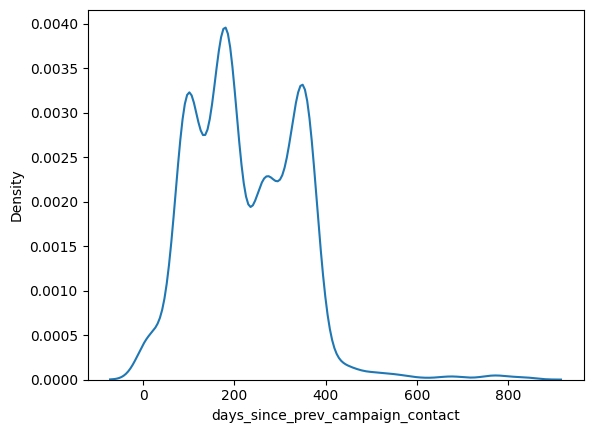

missing values of days_since_prev_campaign_contact 11123


In [116]:
eda('days_since_prev_campaign_contact',df,col_to_miss)

1.Continuous numeric data

2.Missing values to be treated


## **'num_contacts_prev_campaign'**

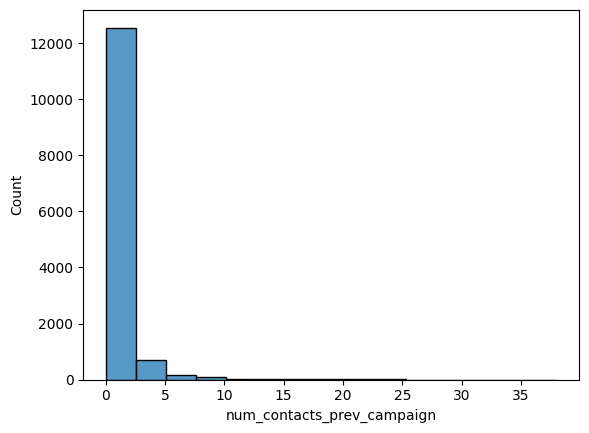

value_counts of num_contacts_prev_campaign num_contacts_prev_campaign
0     11123
1       834
2       599
3       336
4       214
5       148
6        89
7        57
8        38
9        30
11       19
10       19
12       10
13       10
16        7
15        6
19        4
14        4
17        4
23        2
21        2
22        1
26        1
29        1
20        1
28        1
24        1
27        1
18        1
38        1
Name: count, dtype: int64
missing values of num_contacts_prev_campaign 0


In [117]:
eda('num_contacts_prev_campaign',df,col_to_miss)

1.Discrte numeric column

## **'prev_campaign_outcome'**

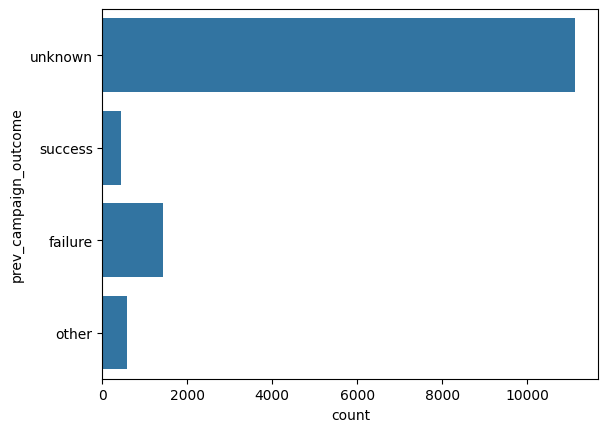

value_counts of prev_campaign_outcome prev_campaign_outcome
unknown    11126
failure     1429
other        568
success      441
Name: count, dtype: int64
missing values of prev_campaign_outcome 0


In [118]:
eda('prev_campaign_outcome',df,col_to_miss)

In [119]:
col_to_le.append('prev_campaign_outcome')

1.Categorical data to be  label encoded
2.Majority has unknown outcome

# **4.Data Cleaning**

### **Handling missing Values**

In [120]:
#Columns t handle missing values
col_to_miss

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [121]:
for i in col_to_miss:
  if df[i].isna().sum()>(0.8*df.shape[0]):
    print(f"column {i} has more than 80% missing values")



column days_since_prev_campaign_contact has more than 80% missing values


In [122]:
df.drop(['days_since_prev_campaign_contact'],axis=1,inplace=True)

In [123]:
#Filling na value with median of the columns
df['customer_age'].fillna(df['customer_age'].median(),inplace=True)

In [124]:
#Marital na values are filled by constant = missing
df['marital'].fillna('missing',inplace=True)

In [125]:
#Filling na values with zero
df['balance']=df['balance'].fillna(0)

In [126]:
#Filling na values with constant=no
df['personal_loan'].fillna('no',inplace=True)

In [127]:
#last_contact_duration
df['last_contact_duration'].fillna(0,inplace=True)

In [128]:
#filling na values with  0
df['num_contacts_in_campaign'].fillna(0,inplace=True)

In [129]:
#num_contacts_in_campaign -data type changed to int
df['num_contacts_in_campaign'] = df['num_contacts_in_campaign'].round().astype(int)


In [130]:
#days_since_prev_campaign_contact na values filled by zero
#df['days_since_prev_campaign_contact'].fillna(0,inplace=True)

In [131]:
df.isna().sum()

id                            0
customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

Missing values are treated.

### **Outliers-Handling**

<Axes: >

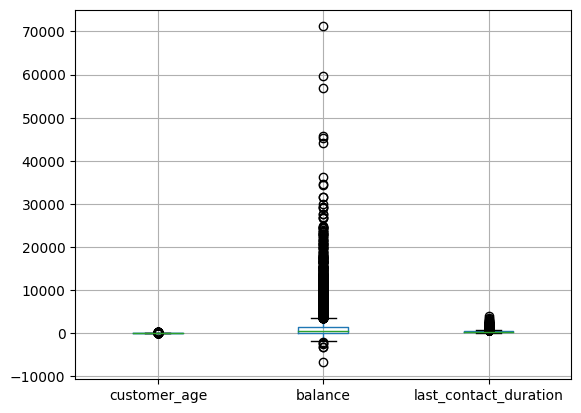

In [132]:
#Plotting boxplots to identify the outliers
df.select_dtypes(include='float').boxplot()

In [133]:
#Identifying ouliers in each column of continuous numeric data
for i in df.select_dtypes(include='float').columns:
  outlier=[]
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier.append(j)
  print(f"outlier for column {i}are ",outlier)
  #Outlier is not handled as it will remove the column 'num_contacts_prev_campaign'

  #Handling outliers
  df[i] = np.clip(df[i], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
  outlier_n=[]
  for j in df[i]:
    if(j< Q1-1.5* IQR) | (j> Q3+1.5* IQR):
      outlier_n.append(j)
  print(f"outlier for column {i}are ",outlier_n)


outlier for column customer_ageare  [79.0, 73.0, 74.0, 73.0, 78.0, 81.0, 80.0, 80.0, 73.0, 81.0, 81.0, 79.0, 73.0, 79.0, 80.0, 75.0, 73.0, 79.0, 85.0, 74.0, 73.0, 77.0, 74.0, 75.0, 85.0, 75.0, 85.0, 78.0, 73.0, 82.0, 76.0, 81.0, 84.0, 75.0, 83.0, 76.0, 80.0, 81.0, 76.0, 75.0, 74.0, 83.0, 80.0, 79.0, 84.0, 82.0, 94.0, 80.0, 81.0, 76.0, 73.0, 79.0, 82.0, 79.0, 84.0, 78.0, 80.0, 78.0, 74.0, 78.0, 73.0, 73.0, 82.0, 79.0, 75.0, 87.0, 78.0, 73.0, 79.0, 81.0, 81.0, 81.0, 77.0, 91.0, 80.0, 77.0, 78.0, 74.0, 84.0, 84.0, 79.0, 74.0, 83.0, 77.0, 74.0, 79.0, 78.0, 77.0, 74.0, 77.0, 77.0, 74.0, 74.0, 84.0, 80.0, 85.0, 90.0, 86.0, 78.0, 75.0]
outlier for column customer_ageare  []
outlier for column balanceare  [7136.0, 6023.0, 3815.0, 5240.0, 10758.0, 6731.0, 4408.0, 19099.0, 5769.0, 6824.0, 3930.0, 5087.0, 5540.0, 6133.0, 16398.0, 5005.0, 7388.0, 6487.0, 5132.0, 4394.0, 4595.0, 8898.0, 3706.0, 4054.0, 5339.0, 4146.0, 3514.0, 5612.0, 7387.0, 3972.0, 6991.0, 6202.0, 7036.0, 9727.0, 4081.0, 15299.0, 

In [134]:
#Creating a copy of data frame and further analysis is done on df_n
df_n=df.copy()

In [135]:
#Dropping the id
df_n.drop(['id'],axis=1,inplace=True)

# **skewness**

Absolute values of skewnwss greater than 0.8 are treated using sqrt transformation.

customer_age
skewnwss for column customer_age is 0.5559919900107957


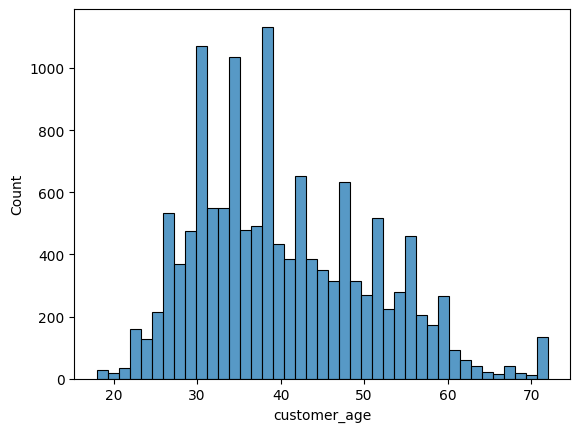

balance
skewnwss for column balance is 1.1103914685709029


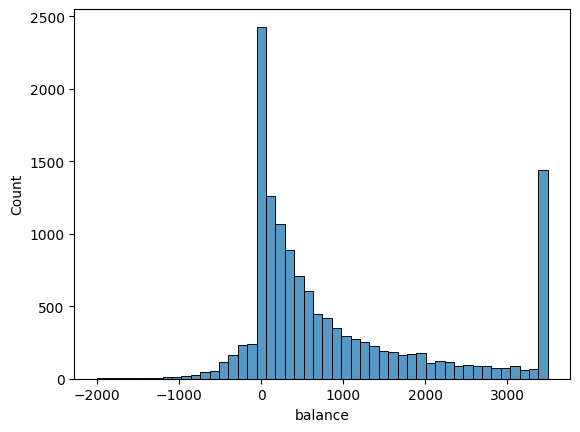

last_contact_duration
skewnwss for column last_contact_duration is 1.0352280275667025


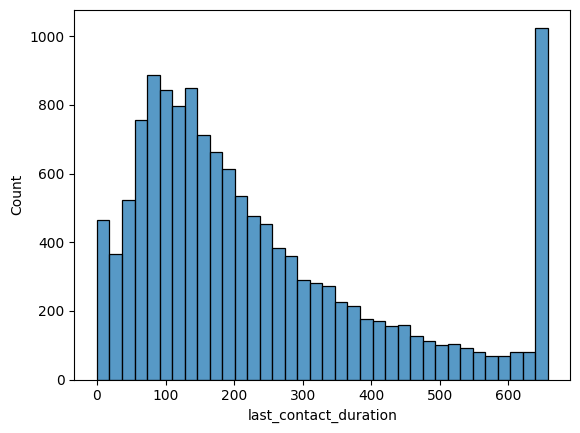

In [136]:
#plotting the histogram before log transformation
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.histplot(df_n[i])
  plt.show()


customer_age
skewnwss for column customer_age is 0.5559919900107957


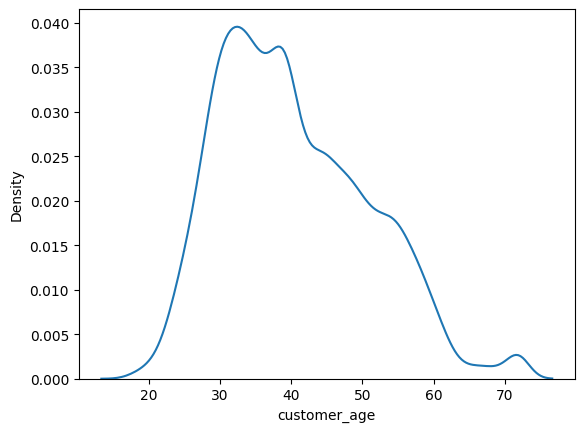

balance
skewnwss for column balance is 1.1103914685709029


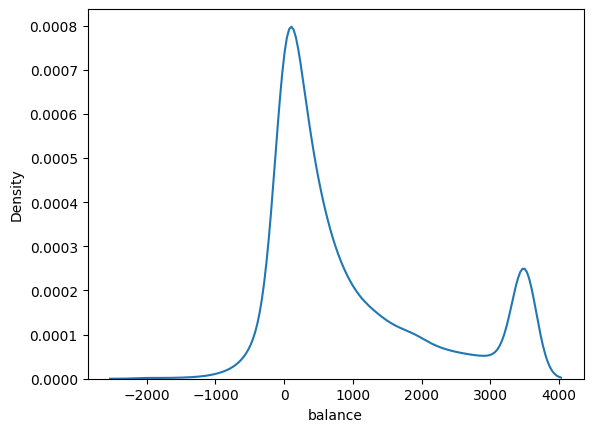

last_contact_duration
skewnwss for column last_contact_duration is 0.24823804720749962


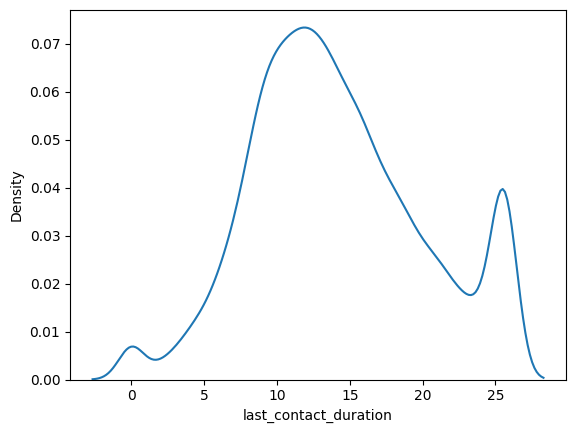

In [137]:
#plotting histograms
pd.set_option('display.max_rows', None)
for i in df_n.select_dtypes(include='float').columns:
  print(i)
  if abs(df_n[i].skew())>0.8 and (i!='balance'):
    df_n[i]=np.sqrt(df_n[i])
  print(f"skewnwss for column {i} is {df_n[i].skew()}")
  sns.kdeplot(df_n[i])
  plt.show()

# **Label encoding**

In [138]:

#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_to_le:
  df_n[i]=le.fit_transform(df_n[i])


In [139]:
#Checking data types to see the encoding
df_n.dtypes

customer_age                  float64
job_type                        int64
marital                         int64
education                       int64
default                         int64
balance                       float64
housing_loan                    int64
personal_loan                   int64
communication_type              int64
day_of_month                    int64
month                           int64
last_contact_duration         float64
num_contacts_in_campaign        int64
num_contacts_prev_campaign      int64
prev_campaign_outcome           int64
dtype: object

In [140]:
df_n.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

# **Scaling**

In [141]:
#Scaled data is stored in df_std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_n)

In [142]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)

In [143]:
joblib.dump(df_std,'test_df_std.joblib')

['test_df_std.joblib']

# **Conclusion after EDA**
1.Both train and test data is anlysed by various plots

2.Univariate,Bivariate,Multivariate analysis has been done od the train data set.

2.Data cleaning is performed on both

3.Missing values has been treated in both

4.Outliers can be  handled by trimming the outliers but its not done here.

5.Skewness of different continuous numeric columns has been identified.sqrt transformation is applied on the three continuous numeric variables except the column,'balance'. When we handle the skewnwss for the 'balance' column, it give some NAn values.

6.Scaling has been done on the data.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
import joblib
from joblib import dump,load

In [4]:
df_n=joblib.load('/content/df_n (4).joblib')

In [146]:
df_n.head()


,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,28.0,4,3,2,0,285.0,1,0,2,17.406895,4,0,0
1,34.0,1,1,1,0,934.0,0,1,0,11.958261,2,1,0
2,46.0,9,1,1,0,656.0,0,0,0,10.049876,4,0,0
3,34.0,7,3,1,0,2.0,1,0,2,11.269428,3,0,0
4,41.0,1,1,0,0,1352.0,1,0,0,7.000000,2,0,0


In [147]:
df_std=joblib.load('/content/df_std (4).joblib')

In [148]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)

In [149]:
df_std.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
0,-1.165641,-0.098901,1.521757,1.037131,-0.13336,-0.347234,0.887675,-0.434972,1.510595,0.441834,0.391246,-0.236683,-0.346596
1,-0.602124,-1.018561,-0.438917,-0.300962,-0.13336,-0.135805,-1.126539,2.299000,-0.714172,-0.359887,-0.243277,0.163376,-0.346596
2,0.524910,1.433866,-0.438917,-0.300962,-0.13336,-0.226371,-1.126539,-0.434972,-0.714172,-0.640690,0.391246,-0.236683,-0.346596
3,-0.602124,0.820759,1.521757,-0.300962,-0.13336,-0.439429,0.887675,-0.434972,1.510595,-0.461243,0.073985,-0.236683,-0.346596
4,0.055312,-1.018561,-0.438917,-1.639055,-0.13336,0.000370,0.887675,-0.434972,-0.714172,-1.089454,-0.243277,-0.236683,-0.346596


In [150]:
df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

# **1.KMEANS clustering**

In [151]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)  # Now fit on the imputed and scaled data
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

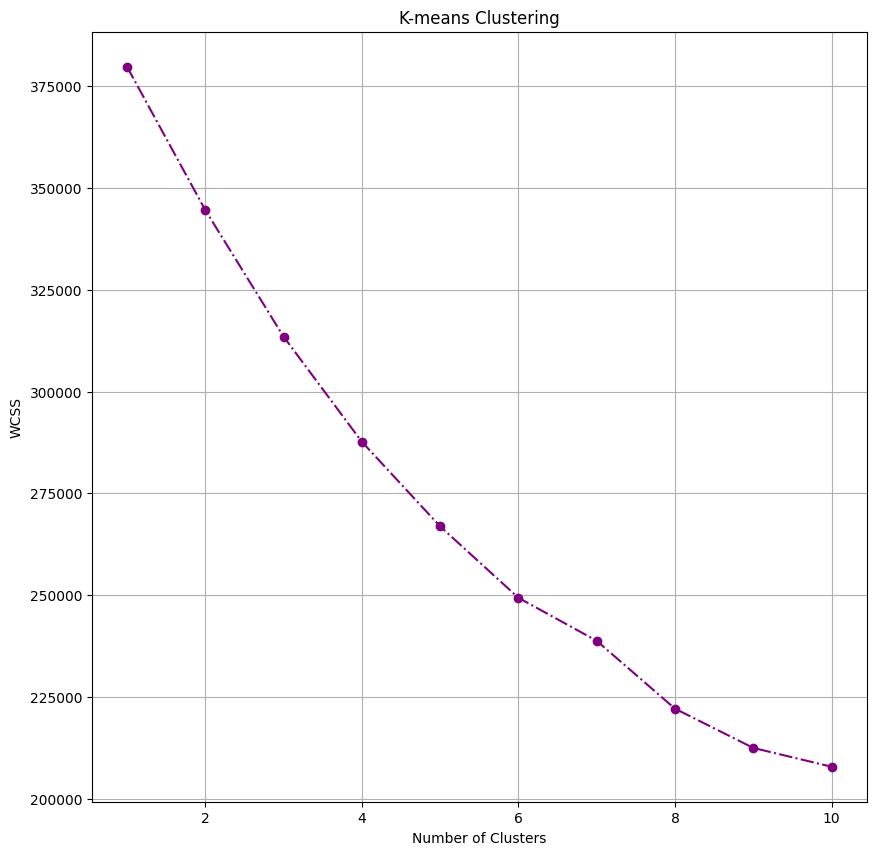

In [152]:
plt.figure(figsize = (10,10))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.grid(True)
plt.show()

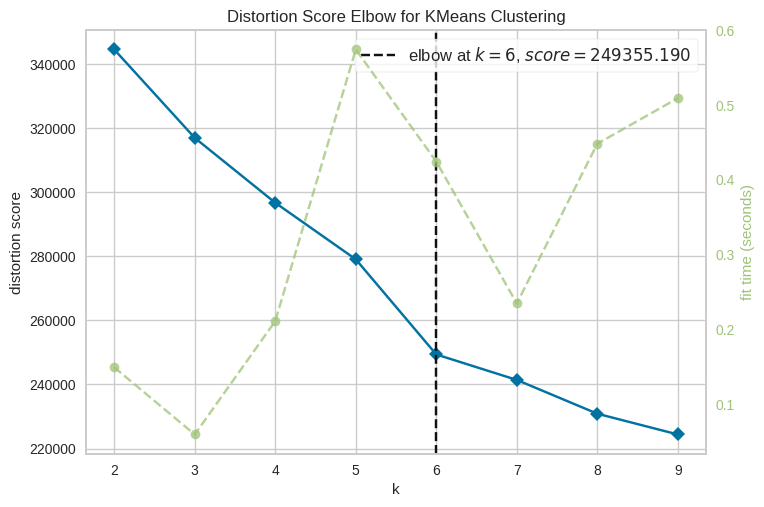

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(df_std)        # Fit the data to the visualizer
visualizer.show()

In [154]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [155]:
kmeans.fit(df_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [156]:
df_kmeans = df_std # Convert df_std to a DataFrame
df_std['labels'] = kmeans.labels_ # Now you can add the column to the DataFrame

In [157]:
df_kmeans_analysis = df_std.groupby(['labels']).mean()
df_kmeans_analysis

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
labels,,,,,,,,,,,,
0,-0.056148,0.041694,0.032711,0.077057,-0.133360,-0.126348,-0.045625,-0.060101,0.210184,-0.760719,4.438393,-0.209255
1,0.038143,-0.186767,-0.583909,-0.174052,-0.133360,-0.052857,0.886469,-0.434972,0.198189,0.017282,-0.138641,0.022136
2,-0.726672,0.187066,1.513917,0.276935,-0.133360,-0.000941,-0.018610,-0.434972,-0.097391,0.048496,-0.163874,0.058672
3,-0.159700,-0.022401,-0.004590,-0.061412,7.498523,-0.484239,-0.066618,0.534031,0.110561,-0.066960,0.110702,-0.125997
4,0.626035,0.102979,-0.554537,0.033804,-0.133360,0.214480,-1.115308,-0.433646,-0.160947,0.017776,-0.084800,-0.040290
5,-0.030009,-0.075515,-0.121694,-0.121472,-0.133360,-0.181809,0.110843,2.299000,-0.040708,0.001900,-0.113992,-0.014484


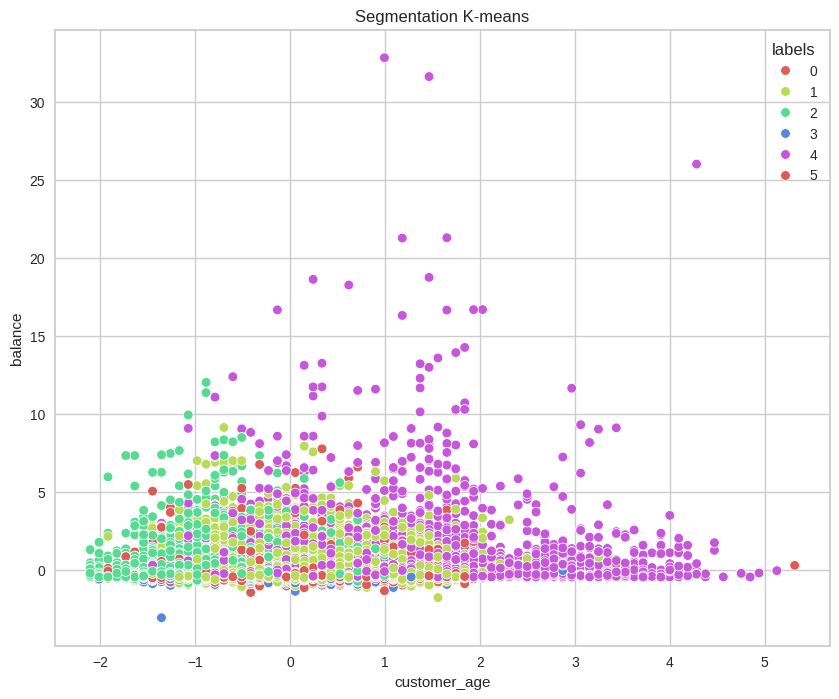

In [158]:

plt.figure(figsize = (10, 8))
# Pass x and y as keyword arguments
sns.scatterplot(x=df_std.iloc[:, 0], y=df_std.iloc[:, 5], hue =df_kmeans['labels'],palette='hls') # Use 'labels' for hue
plt.title('Segmentation K-means')
plt.show()

In [159]:

km = KMeans(n_clusters=6,
            init='k-means++',
            n_init=10,
            max_iter=100,
            random_state=42)

clusters_predict = kmeans.fit_predict(df_std)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [160]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(df_std,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(df_std,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(df_std,clusters_predict)}")

Davies bouldin score: 1.4580606622754997
Calinski Score: 5274.605439006719
Silhouette Score: 0.2382238470441358


# **2.Hierarchical clustering**

In [161]:
df_std=joblib.load('/content/df_std (4).joblib')

In [162]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)


In [163]:
df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

In [164]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [165]:
x=df_std

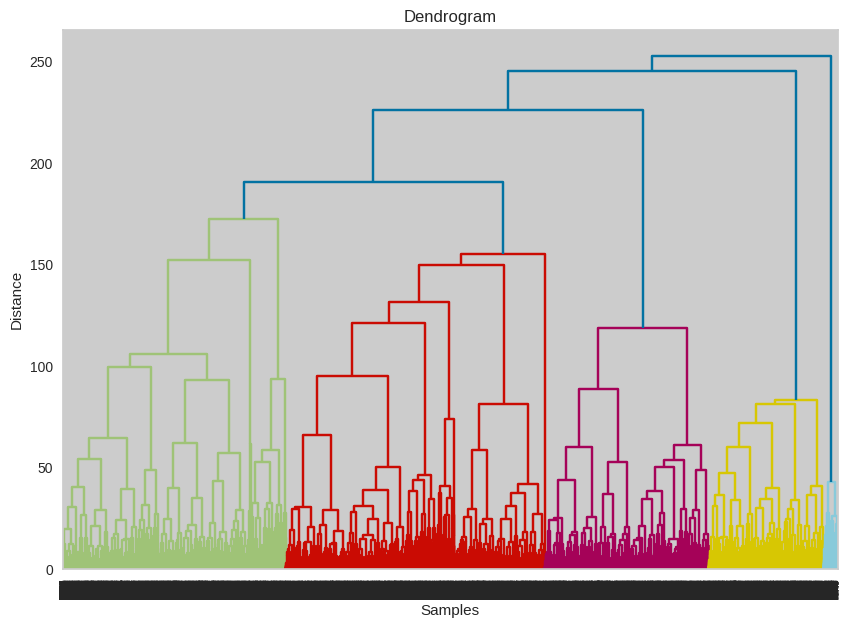

In [166]:
# Perform hierarchical/agglomerative clustering
linked = linkage(x, method='ward')  # Ward's method is commonly used

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [167]:
# You can set a threshold or decide the number of clusters from the dendrogram
#threshold = 7.0  # example threshold
#clusters = fcluster(linked, threshold, criterion='distance')

# If you know the number of clusters you want, you can use:
num_clusters = 10
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to your original data
df_std['Cluster'] = clusters

In [168]:
# Analyze the clusters
print(df_std.groupby('Cluster').mean())

         customer_age  job_type   marital  education   default   balance  \
Cluster                                                                    
1           -0.159700 -0.022401 -0.004590  -0.061412  7.498523 -0.484239   
2           -0.028278 -0.078033 -0.116725  -0.121354 -0.133360 -0.191089   
3           -0.678494  0.155213  1.516644   0.249548 -0.133360 -0.054371   
4            0.091984 -0.215105 -0.590167  -0.287538 -0.133360 -0.127735   
5            0.022731  0.137560  0.063490  -0.023145 -0.133360  0.005866   
6           -0.023929 -0.118145 -0.455424  -0.037806 -0.133360 -0.089437   
7           -0.226446 -0.098901 -0.438917   1.037131 -0.133360 -0.264161   
8            0.081500  0.051912 -0.257373   0.051561 -0.133360 -0.126664   
9            0.486071  0.099322 -0.085111   0.513967 -0.133360  9.553643   
10           0.580508  0.087605 -0.573809   0.012695 -0.133360  0.192765   

         housing_loan  personal_loan  communication_type  \
Cluster                    

In [169]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(df_std, clusters)
db_score = davies_bouldin_score(df_std, clusters)
ch_score = calinski_harabasz_score(df_std, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.2719532977926442
Davies-Bouldin Score: 1.1810344459366533
Calinski-Harabasz Score: 7313.130424961878


3.DBSCAN clustering

In [170]:
df_std=joblib.load('/content/df_std (4).joblib')


In [171]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)

In [172]:
df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

In [173]:
from sklearn.cluster import DBSCAN

In [174]:
# Initialize DBSCAN with chosen parameters
eps = 3  # Example value, adjust as needed
min_samples = 5  # Example value, adjust as needed
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_std)

# Extract cluster labels
labels = db.labels_

# Add cluster labels to your original data
df_std['Cluster'] = labels

In [175]:
df_std['Cluster'].value_counts()

Cluster
 0    31034
 1      537
-1       71
 2        5
Name: count, dtype: int64

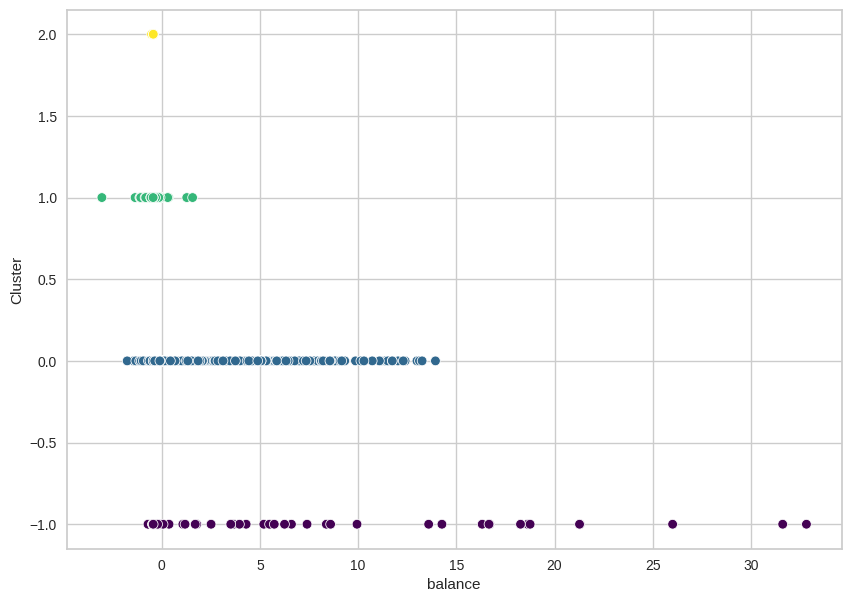

In [195]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_std.iloc[:, 5], y=df_std.iloc[:, 12], c=labels, cmap='viridis')
plt.show()

In [177]:
print(df_std.groupby('Cluster').median())

         customer_age  job_type   marital  education   default   balance  \
Cluster                                                                    
-1           0.055312 -0.098901 -0.438917  -0.300962 -0.133360  0.064874   
 0          -0.132527 -0.098901 -0.438917  -0.300962 -0.133360 -0.293155   
 1          -0.226446 -0.098901 -0.438917  -0.300962  7.498523 -0.442361   
 2          -0.696043  1.433866 -0.438917  -0.300962  7.498523 -0.435846   

         housing_loan  personal_loan  communication_type  \
Cluster                                                    
-1           0.887675      -0.434972           -0.714172   
 0           0.887675      -0.434972           -0.714172   
 1           0.887675      -0.434972           -0.714172   
 2          -1.126539       2.299000           -0.714172   

         last_contact_duration  num_contacts_in_campaign  \
Cluster                                                    
-1                   -0.178514                  0.073985   
 0

In [178]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(df_std, labels)
db_score = davies_bouldin_score(df_std, labels)
ch_score = calinski_harabasz_score(df_std, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.5094794160969408
Davies-Bouldin Score: 1.6511760443926824
Calinski-Harabasz Score: 1136.437565070604


In [179]:
df_new=pd.concat([df_n,df_std],axis=1)

In [180]:
df_new.groupby('Cluster').median()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,...,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
Cluster,,,,,,,,,,,,,,,,,,,,,
-1,41.0,4.0,1.0,1.0,0.0,1550.0,1.0,0.0,0.0,13.190906,...,-0.438917,-0.300962,-0.133360,0.064874,0.887675,-0.434972,-0.714172,-0.178514,0.073985,-0.236683
0,39.0,4.0,1.0,1.0,0.0,451.0,1.0,0.0,0.0,13.341664,...,-0.438917,-0.300962,-0.133360,-0.293155,0.887675,-0.434972,-0.714172,-0.156331,-0.243277,-0.236683
1,38.0,4.0,1.0,1.0,1.0,-7.0,1.0,0.0,0.0,13.266499,...,-0.438917,-0.300962,7.498523,-0.442361,0.887675,-0.434972,-0.714172,-0.167391,-0.243277,-0.236683
2,33.0,9.0,1.0,1.0,1.0,13.0,0.0,1.0,0.0,3.605551,...,-0.438917,-0.300962,7.498523,-0.435846,-1.126539,2.299000,-0.714172,-1.588919,4.832907,-0.236683


In [181]:
df_std.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,Cluster
0,-1.165641,-0.098901,1.521757,1.037131,-0.13336,-0.347234,0.887675,-0.434972,1.510595,0.441834,0.391246,-0.236683,0
1,-0.602124,-1.018561,-0.438917,-0.300962,-0.13336,-0.135805,-1.126539,2.299000,-0.714172,-0.359887,-0.243277,0.163376,0
2,0.524910,1.433866,-0.438917,-0.300962,-0.13336,-0.226371,-1.126539,-0.434972,-0.714172,-0.640690,0.391246,-0.236683,0
3,-0.602124,0.820759,1.521757,-0.300962,-0.13336,-0.439429,0.887675,-0.434972,1.510595,-0.461243,0.073985,-0.236683,0
4,0.055312,-1.018561,-0.438917,-1.639055,-0.13336,0.000370,0.887675,-0.434972,-0.714172,-1.089454,-0.243277,-0.236683,0


Observation:
1.silhoutte score is not adequate for the three clustering models

2.Comparing the three DBSCAN clustering is used for the final analysis.

In [182]:
db = DBSCAN(eps=eps, min_samples=min_samples).fit_predict([[-1.165641,-0.098901,1.521757,1.037131,-0.13336,-0.347234,0.887675,-0.434972,1.510595,0.441834,0.391246,-0.236683,-0.346596]])

In [183]:
db

array([-1])

In [184]:
df_std.columns


Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign', 'Cluster'],
      dtype='object')

# **PCA**

In [5]:
df_std=joblib.load('/content/df_std (4).joblib')


In [6]:
#Convering to a data frame
df_std = pd.DataFrame(df_std, columns=df_n.columns)

In [7]:
df_std.drop('term_deposit_subscribed',axis=1,inplace=True)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pca.fit(df_std)

PCA()

In [10]:
pca.explained_variance_ratio_

array([0.12788379, 0.11851013, 0.09757647, 0.09355372, 0.08800425,
       0.07777404, 0.07623744, 0.07584398, 0.07122456, 0.06813478,
       0.06160892, 0.04364792])

Text(0, 0.5, 'Cumulative Explained Variance')

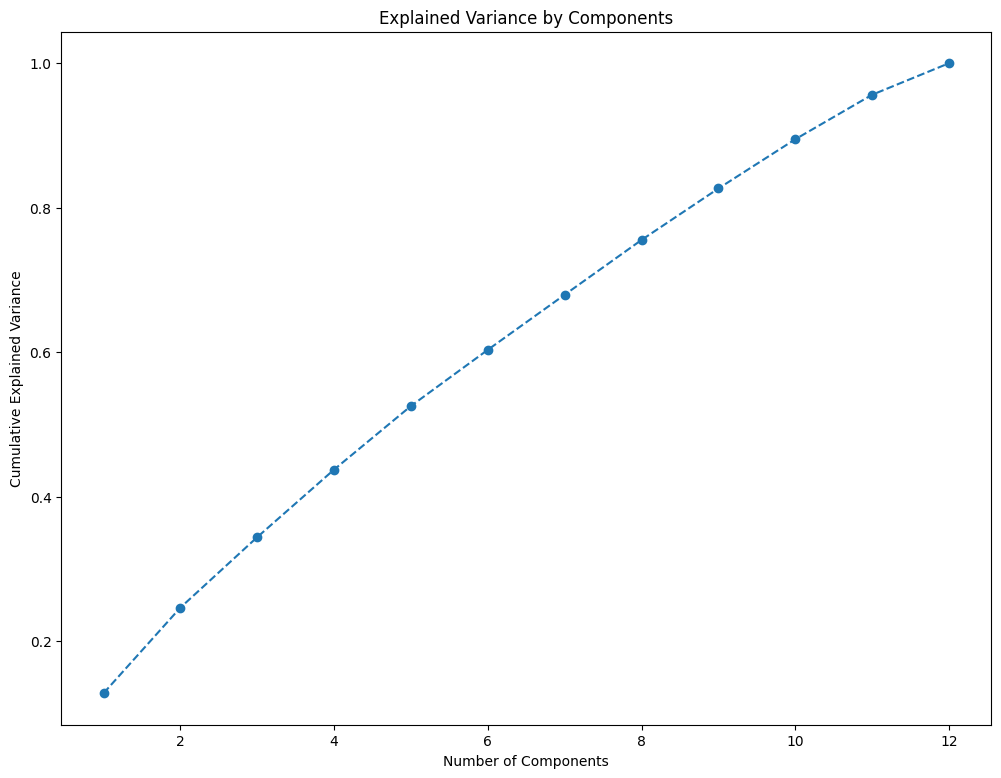

In [11]:
plt.figure(figsize = (12,9))
plt.plot(range(1, pca.explained_variance_ratio_.cumsum().shape[0] + 1),
         pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--') # Adjust the x-axis range to match the length of the y-axis data
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [12]:
pca = PCA(n_components = 9)
pca.fit(df_std)
pca.components_

array([[-0.55411685,  0.29202767,  0.60577212,  0.40299757, -0.00738821,
        -0.01805554, -0.0514566 , -0.0963035 , -0.2311491 ,  0.05048062,
        -0.03742216,  0.09287686],
       [ 0.41240482,  0.31431894, -0.18697722,  0.26547841, -0.11550709,
         0.33063303, -0.55403812, -0.17423886, -0.39070926,  0.04925894,
        -0.01513706,  0.10197932],
       [-0.01251631, -0.18408423, -0.00682294, -0.11911626, -0.23173652,
         0.1645328 ,  0.19702869, -0.12056597, -0.08674581,  0.57807969,
        -0.6309742 ,  0.27885907],
       [ 0.0109488 ,  0.00966568, -0.10068941, -0.0732747 ,  0.43289011,
        -0.39642477, -0.11756599,  0.56404558, -0.43075249,  0.10008598,
        -0.10321441,  0.3186619 ],
       [-0.04336453, -0.26313109, -0.00670532, -0.08405225, -0.33834085,
         0.08242803,  0.18966331, -0.09902535, -0.25398783, -0.41030403,
         0.2722116 ,  0.66915344],
       [ 0.00978666, -0.21441387,  0.06056592,  0.04987605,  0.7810424 ,
         0.41464278,  

In [215]:
# Calculate the number of components from the shape of pca.components_
n_components = pca.components_.shape[1]

# Generate column names dynamically based on the number of components
component_columns = [f'c{i+1}' for i in range(n_components)]

df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_std.columns,index=['c1', 'c2', 'c3','c4','c5','c6','c7','c8','c9'])# Use generated column names)
df_pca_comp

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
c1,-0.554117,0.292028,0.605772,0.402998,-0.007388,-0.018056,-0.051457,-0.096304,-0.231149,0.050481,-0.037422,0.092877
c2,0.412405,0.314319,-0.186977,0.265478,-0.115507,0.330633,-0.554038,-0.174239,-0.390709,0.049259,-0.015137,0.101979
c3,-0.012516,-0.184084,-0.006823,-0.119116,-0.231737,0.164533,0.197029,-0.120566,-0.086746,0.578080,-0.630974,0.278859
c4,0.010949,0.009666,-0.100689,-0.073275,0.432890,-0.396425,-0.117566,0.564046,-0.430752,0.100086,-0.103214,0.318662
c5,-0.043365,-0.263131,-0.006705,-0.084052,-0.338341,0.082428,0.189663,-0.099025,-0.253988,-0.410304,0.272212,0.669153
c6,0.009787,-0.214414,0.060566,0.049876,0.781042,0.414643,0.041953,-0.321188,0.095828,-0.064735,-0.028959,0.216068
c7,0.132015,0.492176,-0.229538,0.127117,0.100778,-0.505979,0.226380,-0.436872,0.235573,0.013867,-0.059693,0.322431
c8,0.039510,0.299079,-0.183988,0.419551,-0.033379,0.412283,0.399362,0.524269,0.238706,-0.104900,-0.091817,0.131384
c9,-0.011297,-0.006083,-0.062809,0.060122,0.018015,0.074148,0.142359,0.013080,-0.015491,0.677084,0.706932,0.087066


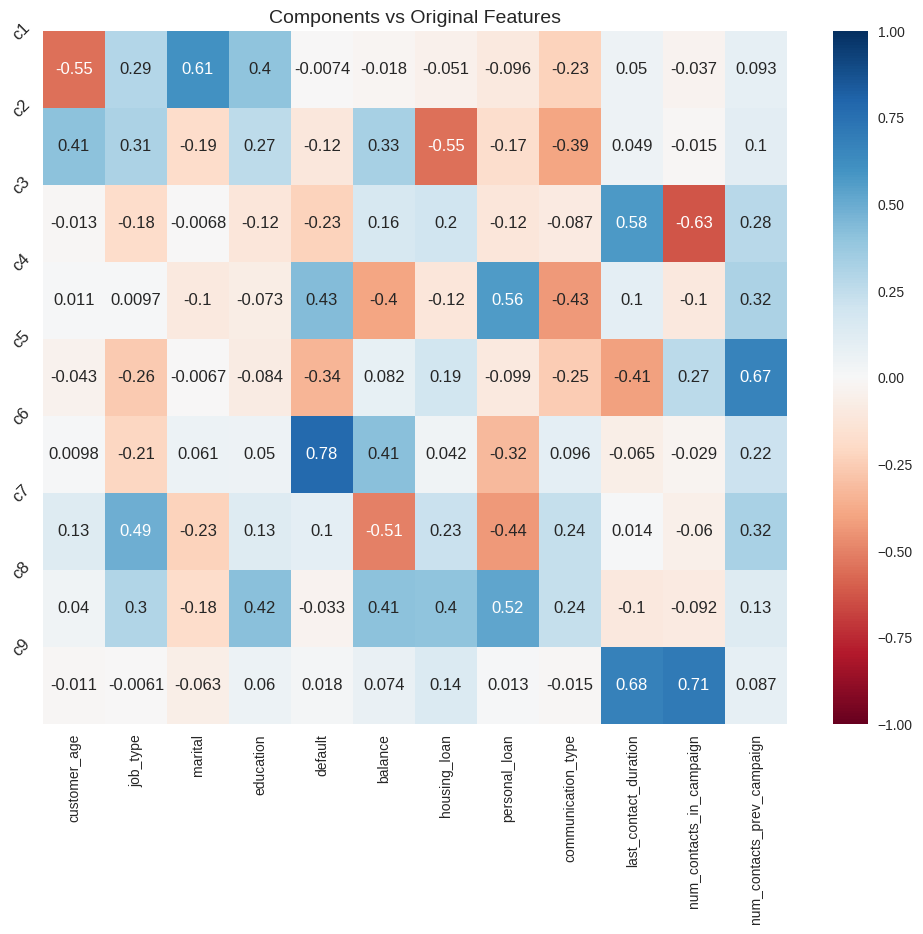

In [216]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3,4,5,6,7,8],
           ['c1', 'c2', 'c3','c4','c5','c6','c7','c8','c9'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [15]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)

# **kmeans after PCA**

In [218]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)  # Now fit on the imputed and scaled data
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

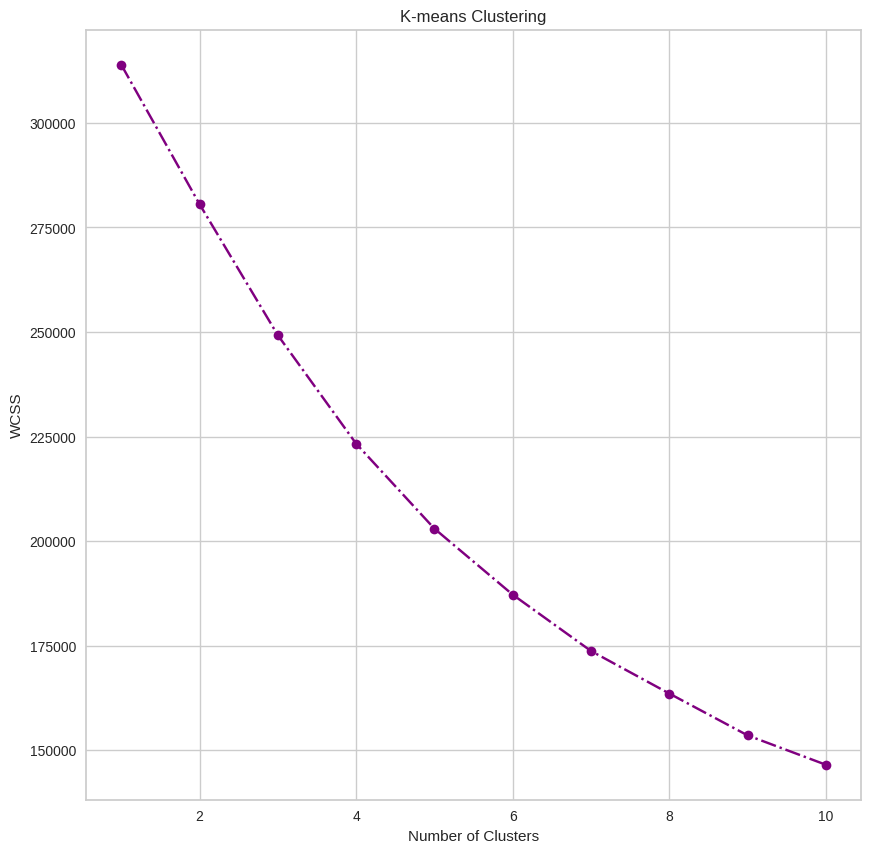

In [219]:
plt.figure(figsize = (10,10))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.grid(True)
plt.show()

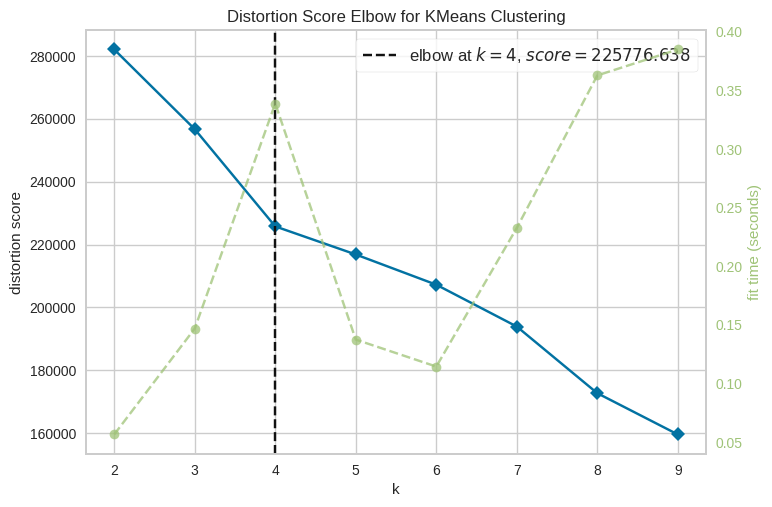

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [221]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(scores_pca)        # Fit the data to the visualizer
visualizer.show()

In [222]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [223]:
kmeans.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [229]:
scores_pca_kmeans = pd.concat([df_n.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
scores_pca_kmeans.columns.values[-9: ] = ['c1', 'c2', 'c3','c4','c5','c6','c7','c8','c9']

scores_pca_kmeans['cluster'] = kmeans.labels_
scores_pca_kmeans.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,...,c1,c2,c3,c4,c5,c6,c7,c8,c9,cluster
0,28.0,4,3,2,0,285.0,1,0,2,17.406895,...,1.596794,-1.634918,-0.088503,-1.234996,-0.409708,0.136189,0.395524,0.314485,0.604812,2
1,34.0,1,1,1,0,934.0,0,1,0,11.958261,...,-0.339777,-0.090581,-0.203732,1.823883,0.287125,-0.778031,-1.828462,0.241001,-0.510670,0
2,46.0,9,1,1,0,656.0,0,0,0,10.049876,...,-0.058259,1.527243,-1.028823,0.132665,-0.123552,-0.538906,0.596809,-0.533040,-0.357189,1
3,34.0,7,3,1,0,2.0,1,0,2,11.269428,...,0.981807,-1.538854,-0.442499,-1.142979,-0.287092,-0.092803,0.805520,0.136255,-0.330176,2
4,41.0,1,1,0,0,1352.0,1,0,0,7.000000,...,-1.160119,-0.845984,0.163007,-0.104245,1.066709,0.141538,-0.469402,-0.843243,-0.866276,1


In [240]:
# We calculate the means by segments.
scores_pca_kmeans_freq = scores_pca_kmeans.groupby(['cluster']).median()
scores_pca_kmeans_freq

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,...,term_deposit_subscribed,c1,c2,c3,c4,c5,c6,c7,c8,c9
cluster,,,,,,,,,,,,,,,,,,,,,
0,39.0,4.0,1.0,1.0,0.0,268.0,1.0,1.0,0.0,13.152946,...,0.0,-0.480843,-0.568786,-0.191068,1.469418,-0.210421,-0.945254,-0.978446,1.093891,-0.144081
1,45.0,4.0,1.0,1.0,0.0,519.0,1.0,0.0,0.0,13.190906,...,0.0,-0.690536,0.188250,0.153769,-0.209848,0.021893,0.009811,0.254196,-0.264215,-0.151519
2,32.0,4.0,3.0,2.0,0.0,467.5,1.0,0.0,0.0,13.638182,...,0.0,1.233674,-0.034566,0.107269,-0.131600,-0.020656,-0.035745,0.048918,-0.266442,-0.188897
3,38.0,4.0,1.0,1.0,1.0,-5.0,1.0,0.0,0.0,13.038405,...,0.0,-0.130181,-1.250893,-1.942240,3.524788,-2.747036,5.551130,0.755878,-0.323297,-0.076133


In [231]:
scores_pca_kmeans_freq['N Obs'] = scores_pca_kmeans[['cluster','marital']].groupby(['cluster']).count()
scores_pca_kmeans_freq['Prop Obs'] = scores_pca_kmeans_freq['N Obs'] / scores_pca_kmeans_freq['N Obs'].sum()

scores_pca_kmeans_freq

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,...,c2,c3,c4,c5,c6,c7,c8,c9,N Obs,Prop Obs
cluster,,,,,,,,,,,,,,,,,,,,,
0,40.100393,4.070793,1.324156,1.134755,0.0,798.755951,0.612089,1.000000,0.607949,14.265259,...,-0.538881,-0.248116,1.320812,-0.146122,-0.919366,-0.952324,1.113523,0.020557,4831,0.152653
1,45.749697,3.793189,0.857152,1.037689,0.0,1599.753778,0.557554,0.000191,0.789746,14.303413,...,0.248471,0.107730,-0.339698,0.085991,0.069389,0.247657,-0.184390,0.012701,15681,0.495497
2,32.730675,5.225950,2.379512,1.545927,0.0,1311.775846,0.539501,0.000473,0.433472,14.640517,...,-0.057814,0.059962,-0.290045,0.079297,0.031251,0.031643,-0.223213,-0.034240,10582,0.334376
3,38.710669,4.249548,1.443038,1.179024,1.0,-135.547920,0.526221,0.354430,0.741410,13.949044,...,-1.231746,-2.034682,3.644145,-2.679261,5.465958,0.691342,-0.227796,0.115459,553,0.017474


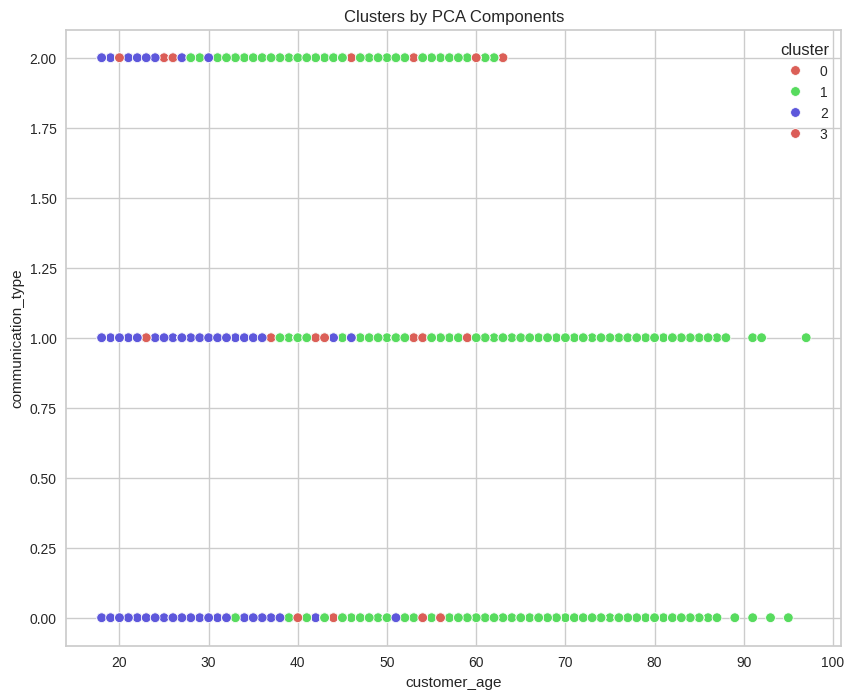

In [239]:

plt.figure(figsize = (10, 8))
sns.scatterplot(x=scores_pca_kmeans.iloc[:,0], y=scores_pca_kmeans.iloc[:,8], hue = scores_pca_kmeans['cluster'], palette ='hls')
plt.title('Clusters by PCA Components')
plt.show()

In [241]:

km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=100,
            random_state=42)

clusters_predict = kmeans.fit_predict(scores_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [242]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print(f"Davies bouldin score: {davies_bouldin_score(df_std,clusters_predict)}")
print(f"Calinski Score: {calinski_harabasz_score(df_std,clusters_predict)}")
print(f"Silhouette Score: {silhouette_score(df_std,clusters_predict)}")

Davies bouldin score: 1.9556481307104545
Calinski Score: 3361.995098294576
Silhouette Score: 0.13964636591744276


# **DBSCAN after PCA**

In [18]:
from sklearn.cluster import DBSCAN

In [30]:
scores_pca_db=scores_pca

In [31]:
scores_pca_db = pd.DataFrame(scores_pca_db)

In [32]:
# Initialize DBSCAN with chosen parameters
eps = 3  # Example value, adjust as needed
min_samples = 5  # Example value, adjust as needed
db = DBSCAN(eps=eps, min_samples=min_samples).fit(scores_pca_db)

# Extract cluster labels
labels = db.labels_

# Add cluster labels to your original data
scores_pca_db['Cluster'] = labels

In [33]:
scores_pca_db['Cluster'].value_counts()

Cluster
 0    31053
 1      548
-1       40
 2        6
Name: count, dtype: int64

In [34]:
scores_pca_db_n=pd.concat([df_n,scores_pca_db],axis=1)

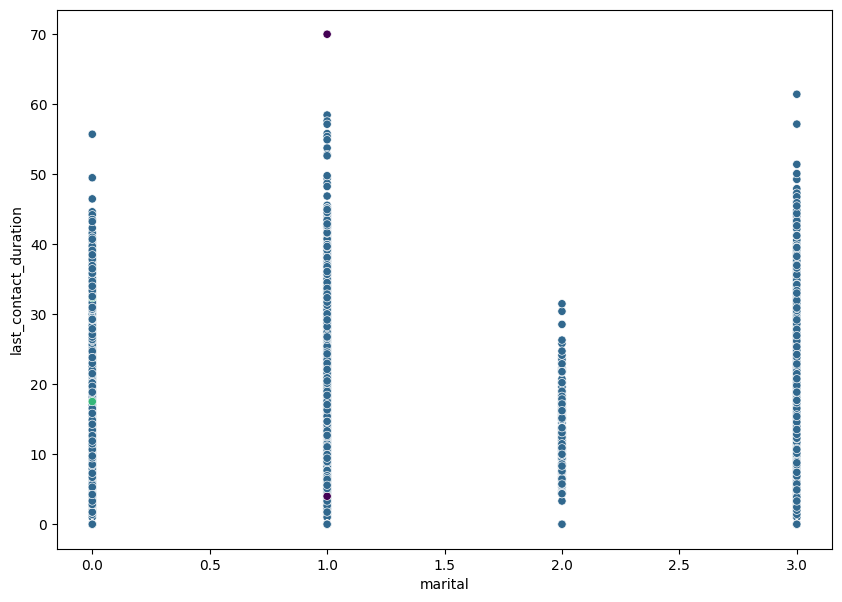

In [42]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scores_pca_db_n.iloc[:, 2], y=scores_pca_db_n.iloc[:, 9], c=labels, cmap='viridis')
plt.show()

In [37]:
print(scores_pca_db_n.groupby('Cluster').median())

         customer_age  job_type  marital  education  default  balance  \
Cluster                                                                 
-1               39.0       4.0      1.0        2.0      0.0   1025.0   
 0               39.0       4.0      1.0        1.0      0.0    451.0   
 1               38.0       4.0      1.0        1.0      1.0     -5.0   
 2               54.5       3.5      1.0        1.0      0.0  57984.5   

         housing_loan  personal_loan  communication_type  \
Cluster                                                    
-1                1.0            0.0                 0.0   
 0                1.0            0.0                 0.0   
 1                1.0            0.0                 0.0   
 2                0.0            0.0                 0.0   

         last_contact_duration  ...  term_deposit_subscribed         0  \
Cluster                         ...                                      
-1                   15.066519  ...                 

In [38]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(scores_pca_db, labels)
db_score = davies_bouldin_score(scores_pca_db, labels)
ch_score = calinski_harabasz_score(scores_pca_db, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.5590669962584616
Davies-Bouldin Score: 1.44104871456209
Calinski-Harabasz Score: 1437.3220625914394


In [39]:
df_new=pd.concat([df_n,scores_pca_db],axis=1)

In [40]:
df_new.groupby('Cluster').median()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,...,term_deposit_subscribed,0,1,2,3,4,5,6,7,8
Cluster,,,,,,,,,,,,,,,,,,,,,
-1,39.0,4.0,1.0,2.0,0.0,1025.0,1.0,0.0,0.0,15.066519,...,0.0,0.370060,1.387572,2.486798,1.117328,3.936178,3.270575,1.134903,1.789340,2.534240
0,39.0,4.0,1.0,1.0,0.0,451.0,1.0,0.0,0.0,13.341664,...,0.0,-0.119536,-0.028327,0.082725,-0.031350,-0.026769,-0.084302,0.047635,-0.085409,-0.163875
1,38.0,4.0,1.0,1.0,1.0,-5.0,1.0,0.0,0.0,13.057551,...,0.0,-0.136344,-1.245901,-1.951868,3.523006,-2.755506,5.534397,0.748604,-0.324744,-0.078001
2,54.5,3.5,1.0,1.0,0.0,57984.5,0.0,0.0,0.0,17.287528,...,0.0,-1.527782,7.419890,3.351556,-7.500728,1.256652,7.601015,-8.938317,7.018703,1.249299


# **Conclusion:**

DBSCAN clustering is selected as the silhoutte score is maximum.
